# PREDIÇÃO DE PREÇO DE IMÓVEIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# ANÁLISES PRELIMINARES

In [2]:
Data = pd.read_csv("Precos_Imoveis.csv")

In [3]:
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.DataFrame(data = {"Nulos": Data.isna().sum()})

,Nulos
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [5]:
def Remove_Null_Data():
    Data["Alley"] = Data["Alley"].fillna("No Alley")
    Data["MasVnrType"] = Data["MasVnrType"].fillna("No Masonry")
    Data["BsmtQual"] = Data["BsmtQual"].fillna("No Basement")
    Data["BsmtCond"] = Data["BsmtCond"].fillna("No Basement")
    Data["BsmtExposure"] = Data["BsmtExposure"].fillna("No Basement")
    Data["BsmtFinType1"] = Data["BsmtFinType1"].fillna("No Basement")
    Data["BsmtFinType2"] = Data["BsmtFinType2"].fillna("No Basement")
    Data["FireplaceQu"] = Data["FireplaceQu"].fillna("No Fireplace")
    Data["GarageType"] = Data["GarageType"].fillna("No Garage")
    Data["GarageFinish"] = Data["GarageFinish"].fillna("No Garage")
    Data["GarageQual"] = Data["GarageQual"].fillna("No Garage")
    Data["GarageCond"] = Data["GarageCond"].fillna("No Garage")
    Data["PoolQC"] = Data["PoolQC"].fillna("No Pool")
    Data["Fence"] = Data["Fence"].fillna("No Fence")
    Data["MiscFeature"] = Data["MiscFeature"].fillna("No Miscellaneous")
    Data["Electrical"] = Data["Electrical"].fillna("No Electrical")
    Data["LotFrontage"] = Data["LotFrontage"].fillna(Data["LotFrontage"].mean())
    Data["GarageYrBlt"] = Data["GarageYrBlt"].fillna(Data["GarageYrBlt"].mean())
    Data["MasVnrArea"] = Data["MasVnrArea"].fillna(Data["MasVnrArea"].mean())

In [6]:
Remove_Null_Data()

In [7]:
Data.isna().sum().sum()

0

In [8]:
pd.DataFrame(data = {"Correlacao": Data.corr()["SalePrice"]}).sort_values(by = "Correlacao", ascending = False)

,Correlacao
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [9]:
def Variable_Number(Data):
    N_Obj = list()
    N_Num = list()
    for Col in Data.columns:
        if(Data[Col].dtypes == "O"):
            N_Obj.append(Col)
        else:
            N_Num.append(Col)
    return N_Obj, N_Num

In [10]:
Cat_List, Num_List = Variable_Number(Data)

# ANÁLISE DA DISTRIBUIÇÃO DA VARIÁVEL ALVO

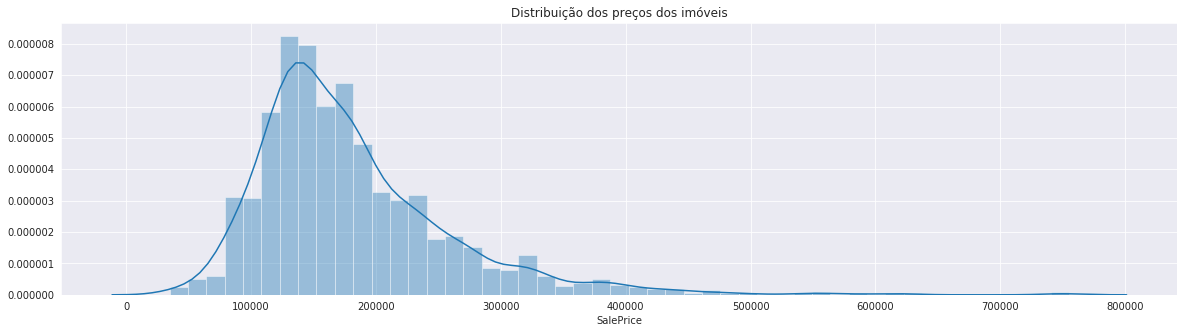

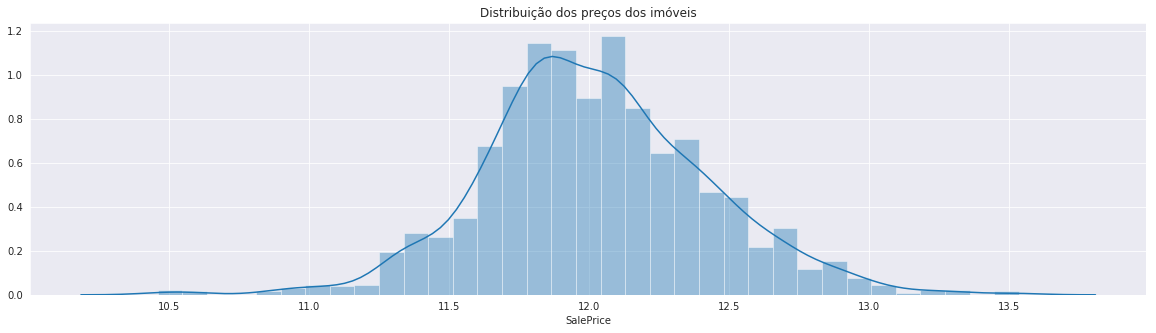

In [11]:
plt.figure(figsize = (20, 5))
sns.distplot(Data["SalePrice"])
plt.title("Distribuição dos preços dos imóveis")
plt.show()
plt.figure(figsize = (20, 5))
sns.distplot(np.log1p(Data["SalePrice"]))
plt.title("Distribuição dos preços dos imóveis")
plt.show()

# ANÁLISE DAS MAIORES CORRELAÇÕES

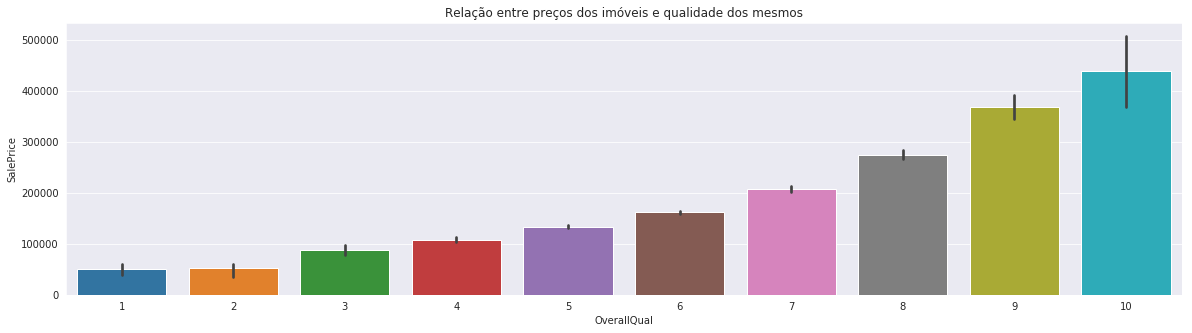

In [12]:
plt.figure(figsize = (20, 5))
sns.barplot(Data["OverallQual"], Data["SalePrice"])
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")
plt.show()

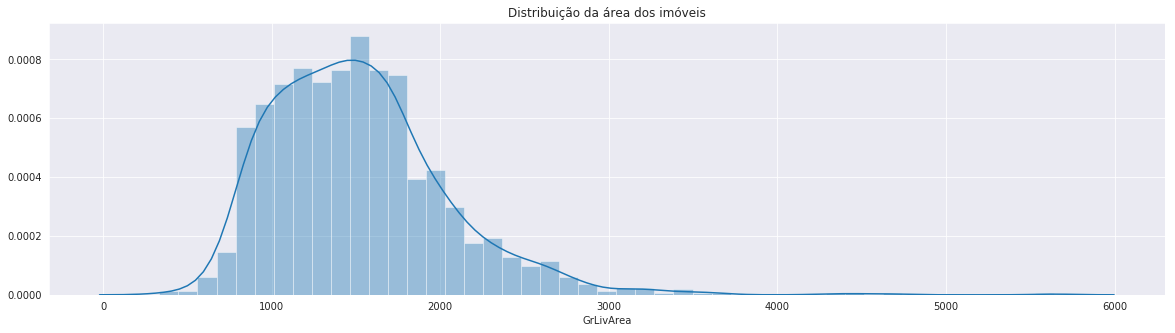

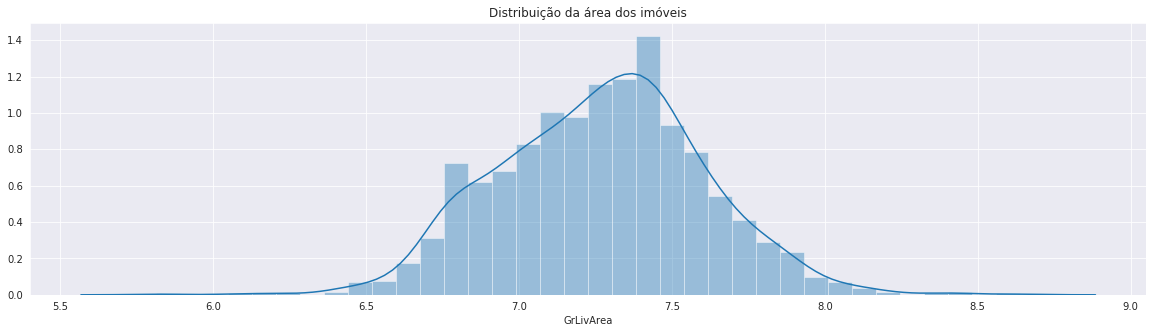

In [13]:
plt.figure(figsize = (20, 5))
sns.distplot(Data["GrLivArea"])
plt.title("Distribuição da área dos imóveis")
plt.show()
plt.figure(figsize = (20, 5))
sns.distplot(np.log1p(Data["GrLivArea"]))
plt.title("Distribuição da área dos imóveis")
plt.show()

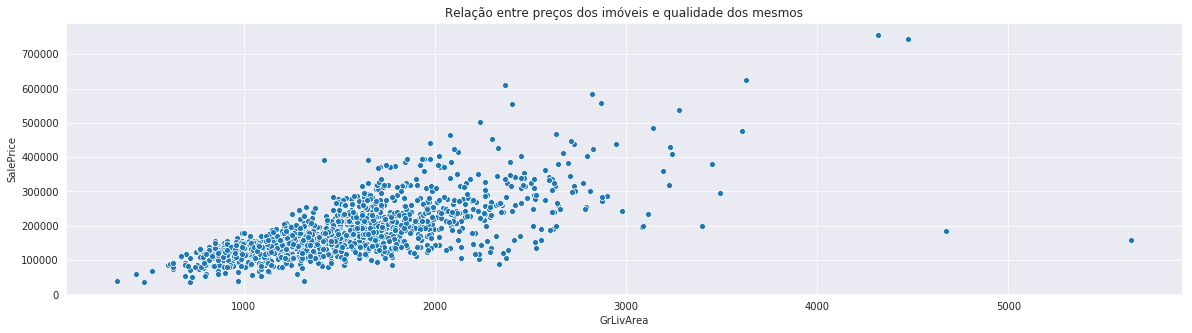

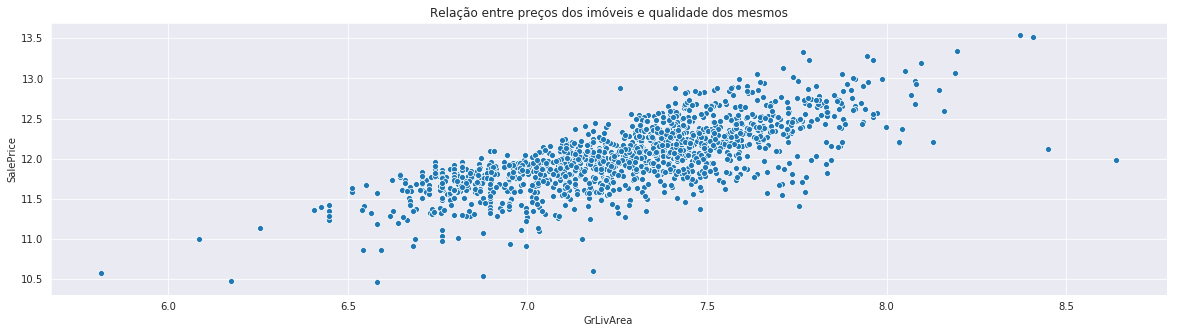

In [14]:
plt.figure(figsize = (20, 5))
sns.scatterplot(Data["GrLivArea"], Data["SalePrice"])
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")
plt.show()
plt.figure(figsize = (20, 5))
sns.scatterplot(np.log1p(Data["GrLivArea"]), np.log1p(Data["SalePrice"]))
plt.title("Relação entre preços dos imóveis e qualidade dos mesmos")
plt.show()

# ANÁLISE GRÁFICA DAS VARIÁVEIS

In [15]:
def Distribuition_Numerical_Variables(Data, Num_List):
    for Col in Num_List:
        plt.figure(figsize = (20, 5))
        sns.distplot(Data[Col])
        plt.show()

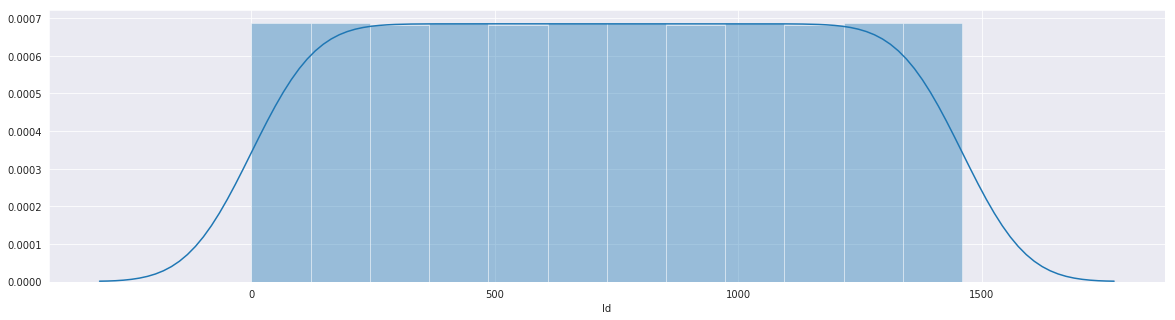

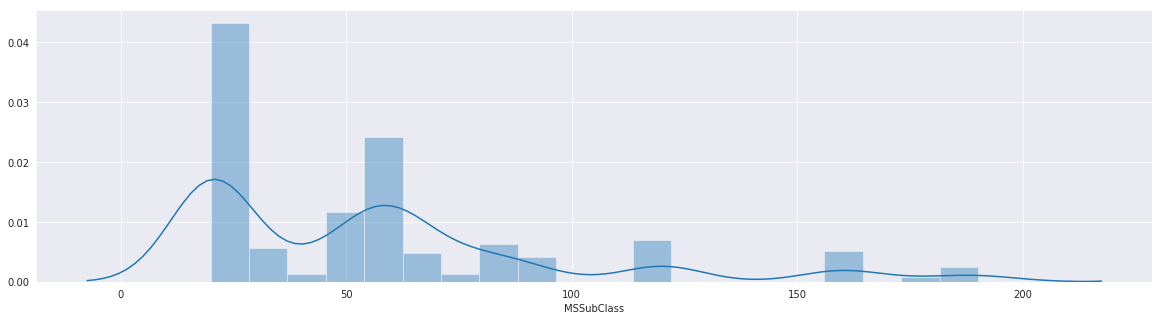

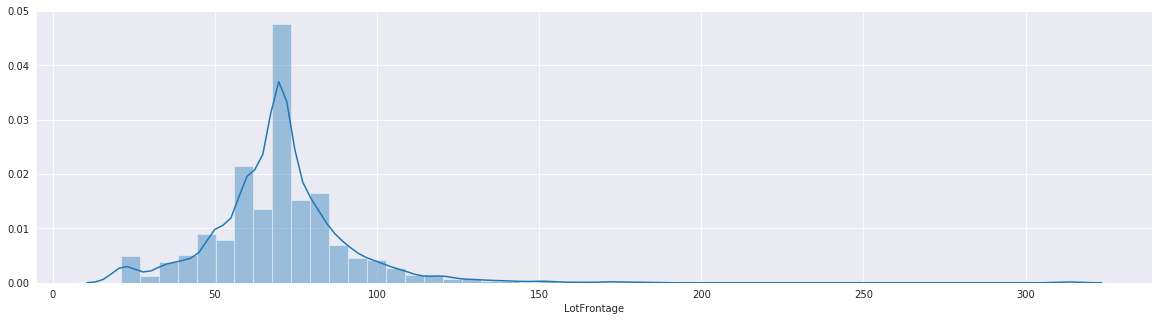

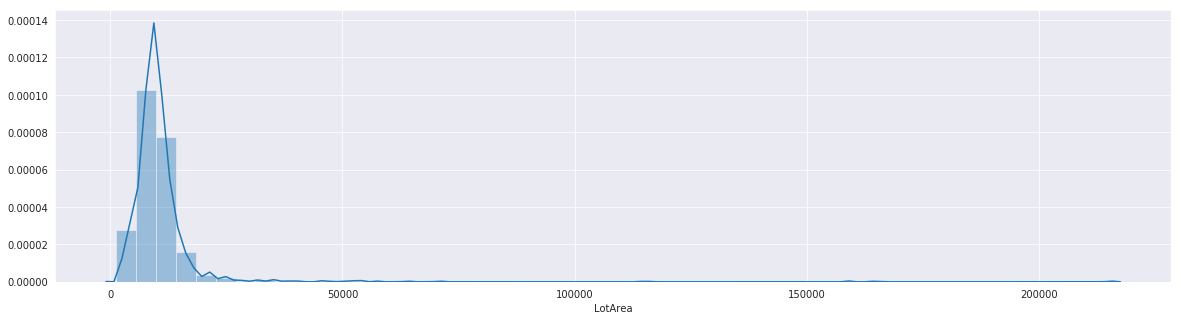

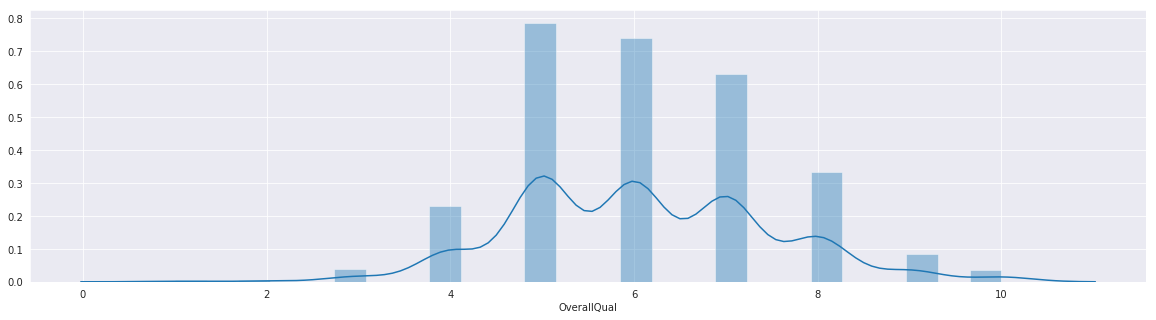

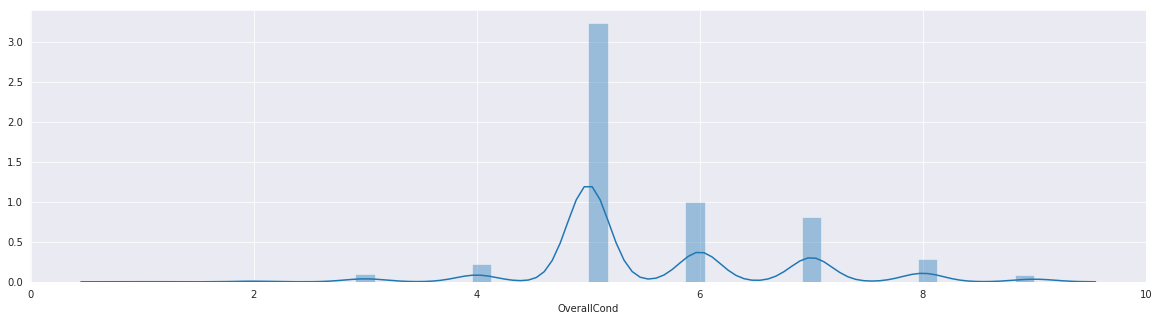

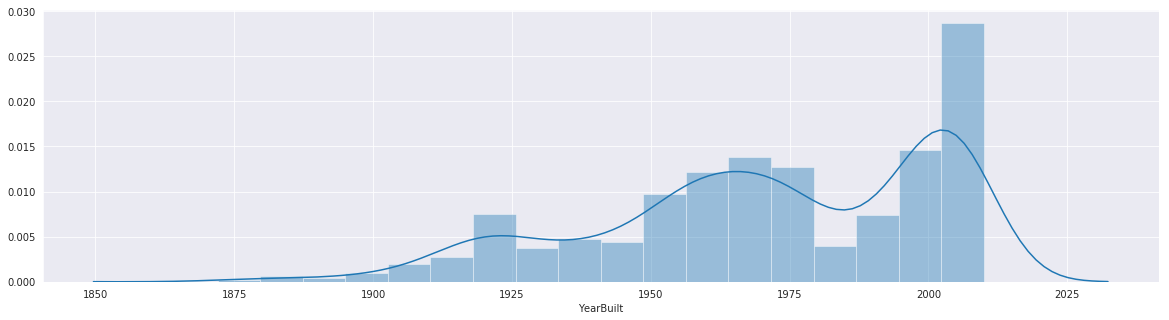

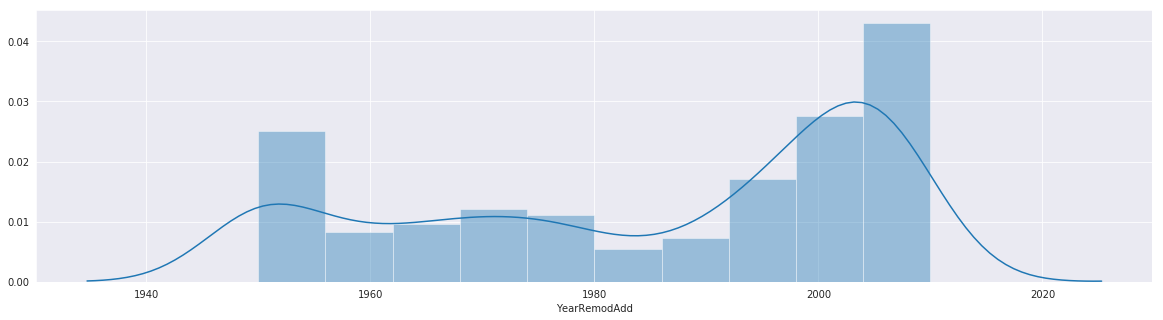

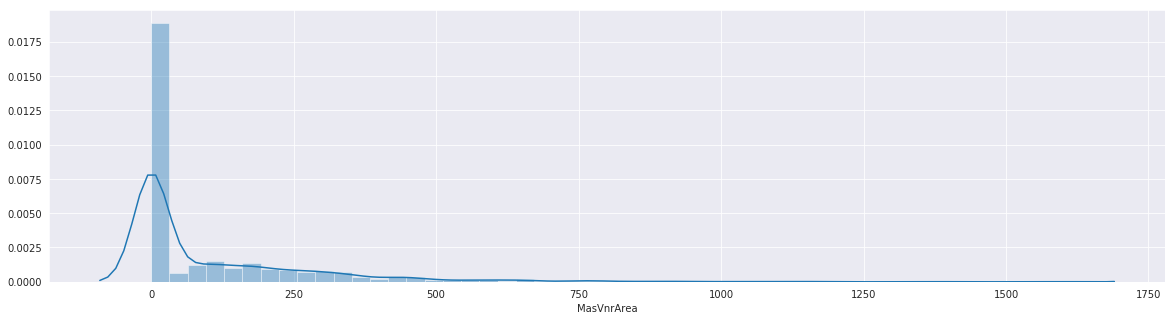

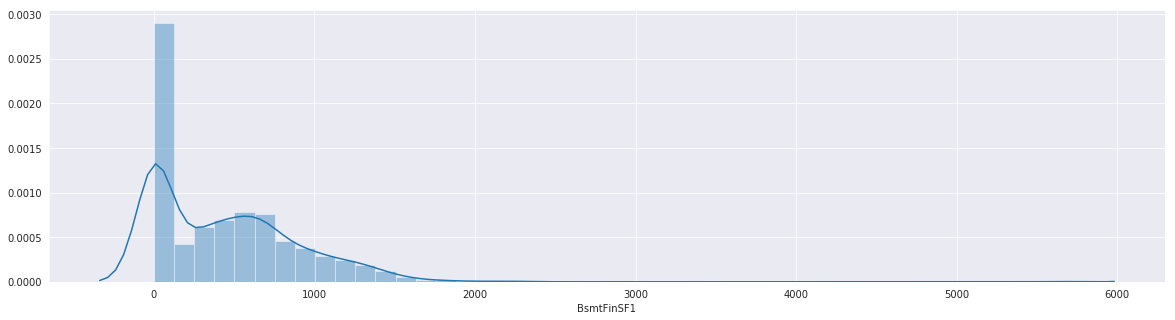

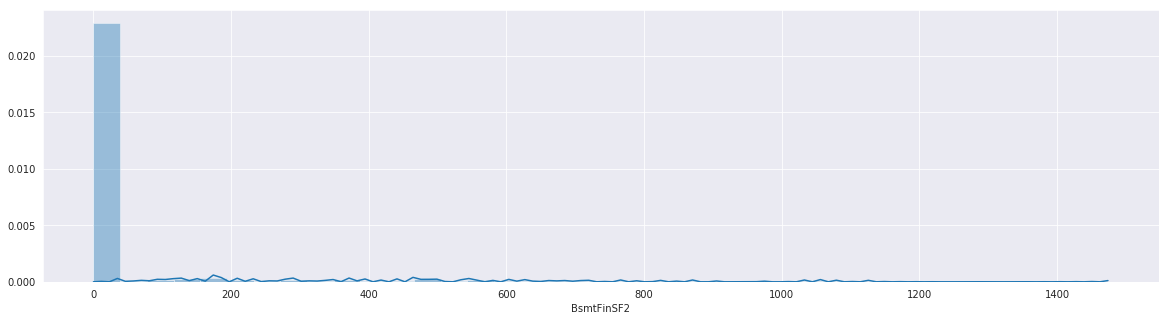

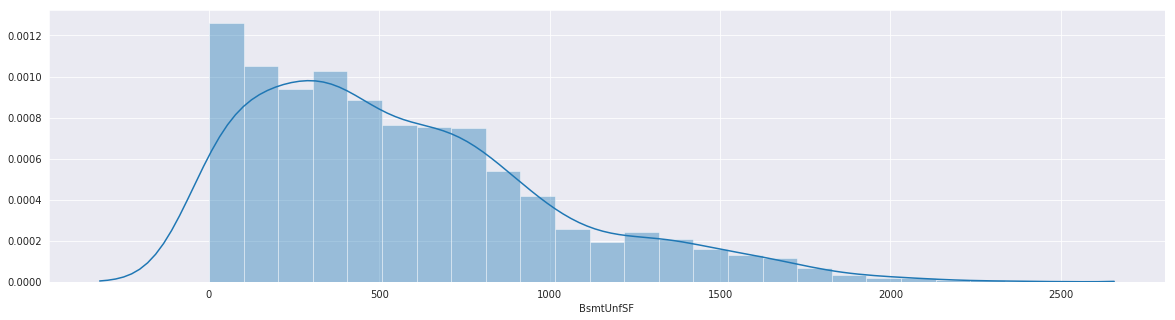

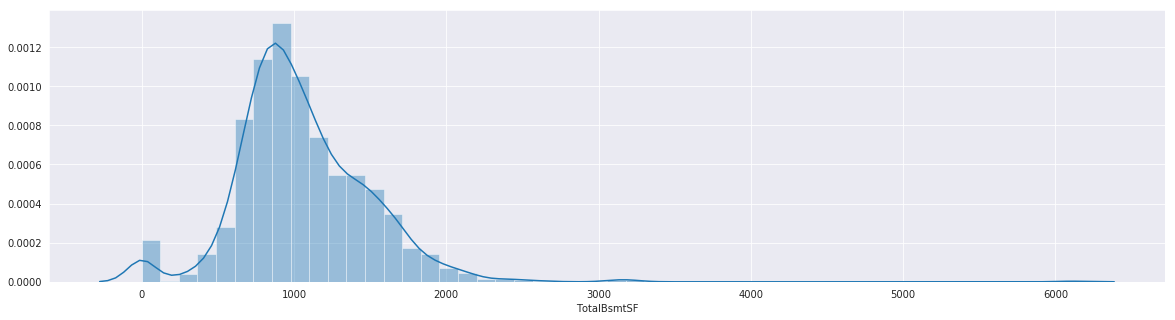

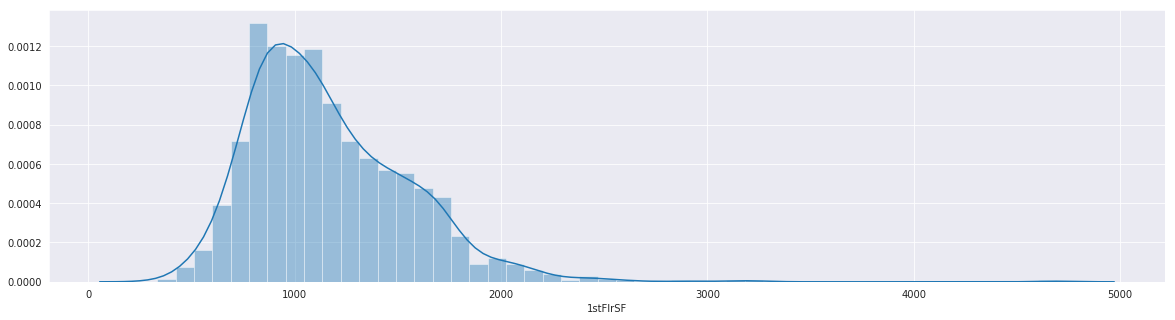

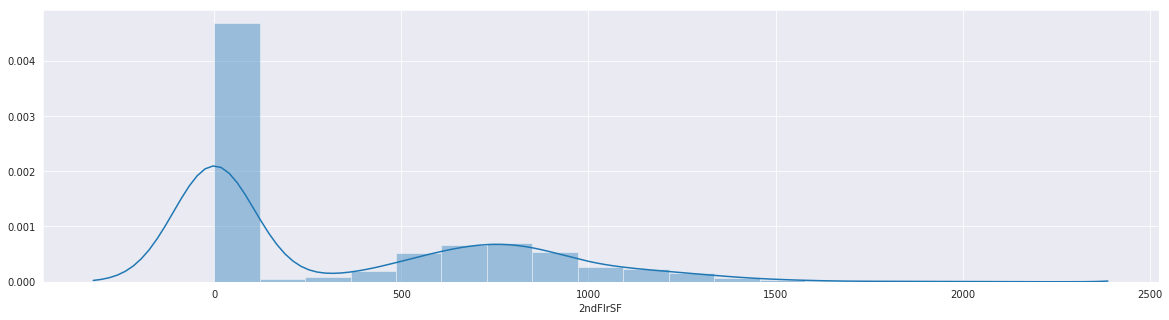

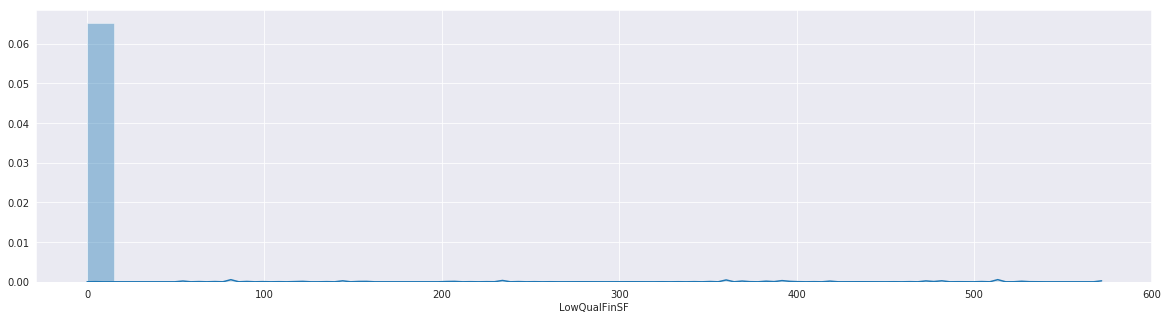

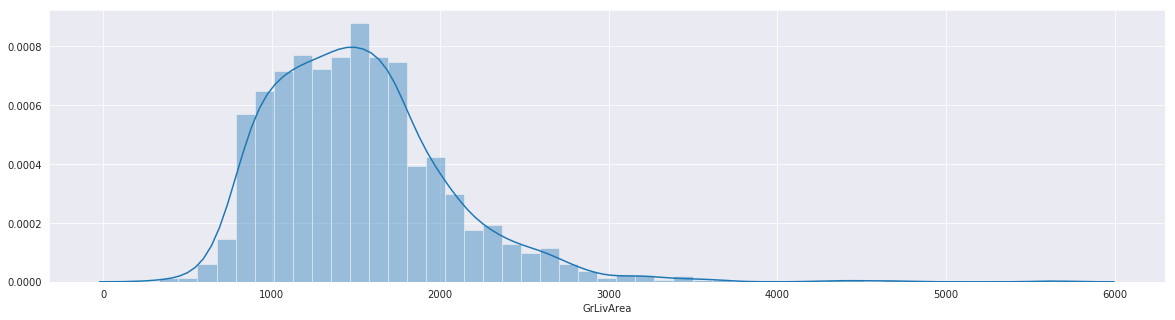

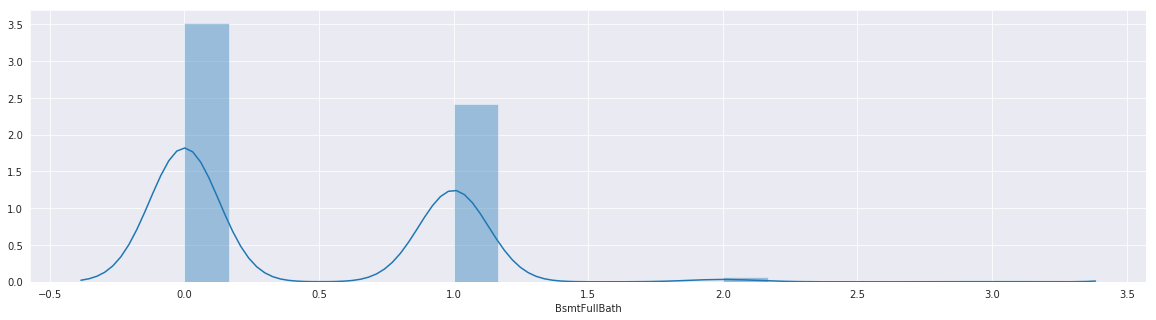

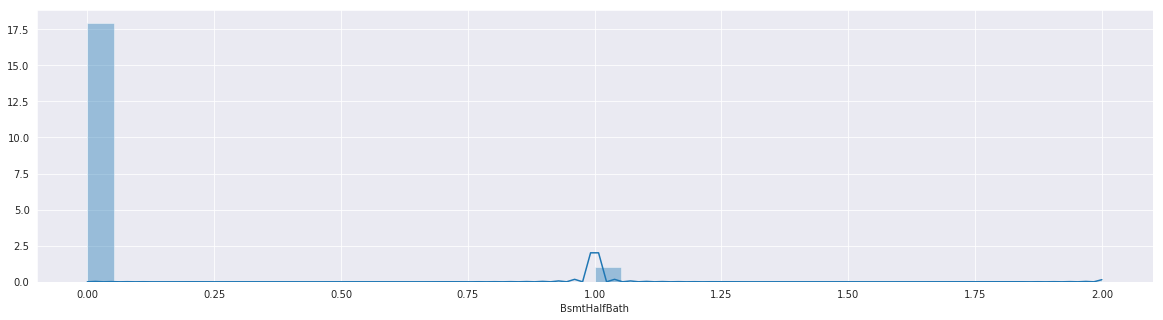

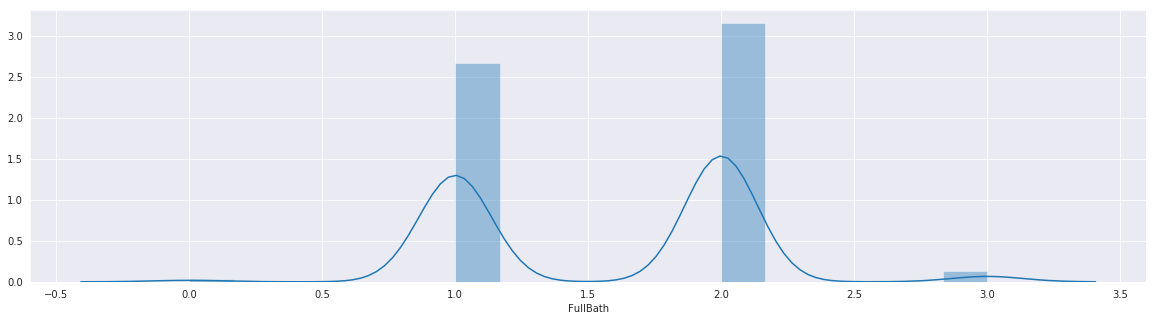

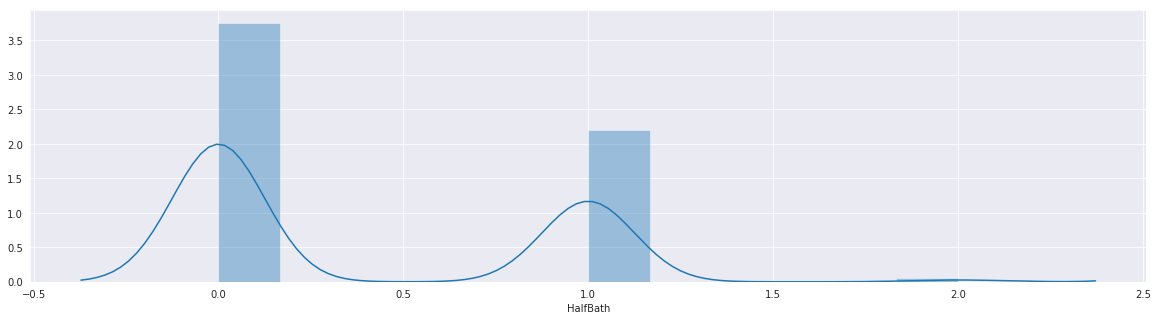

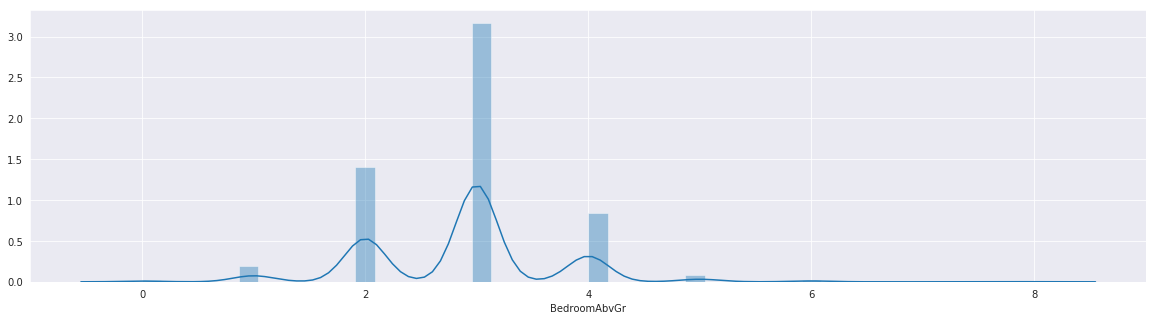

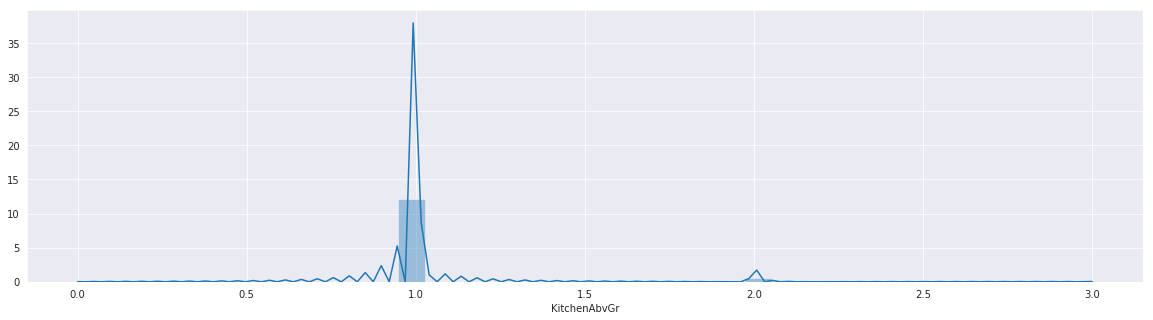

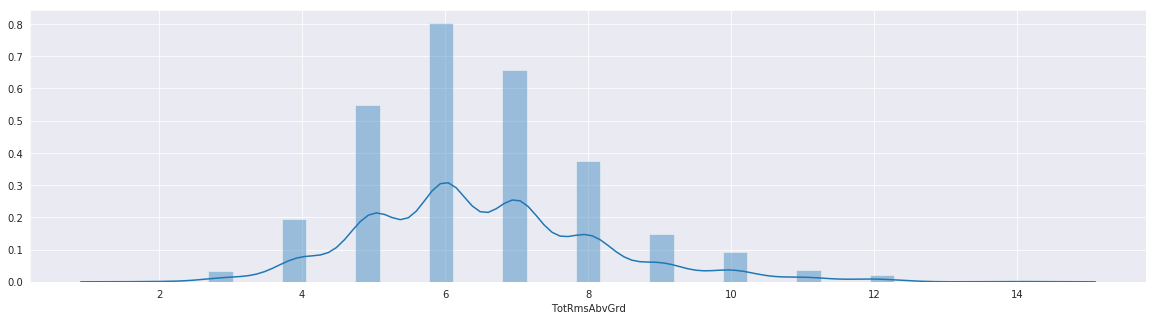

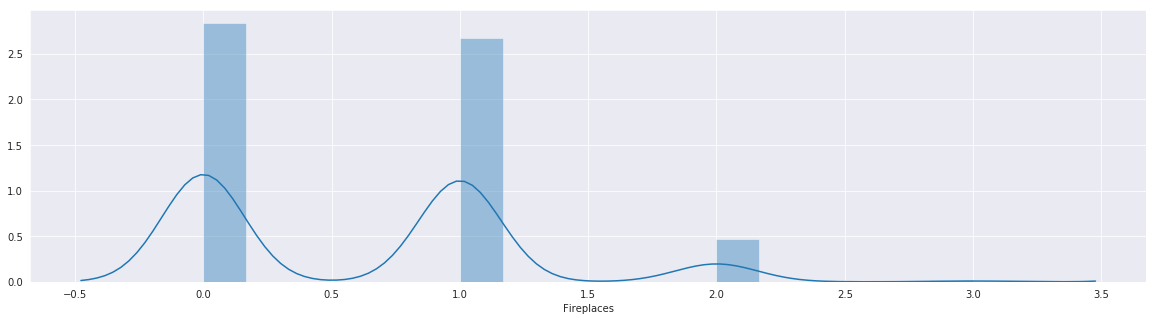

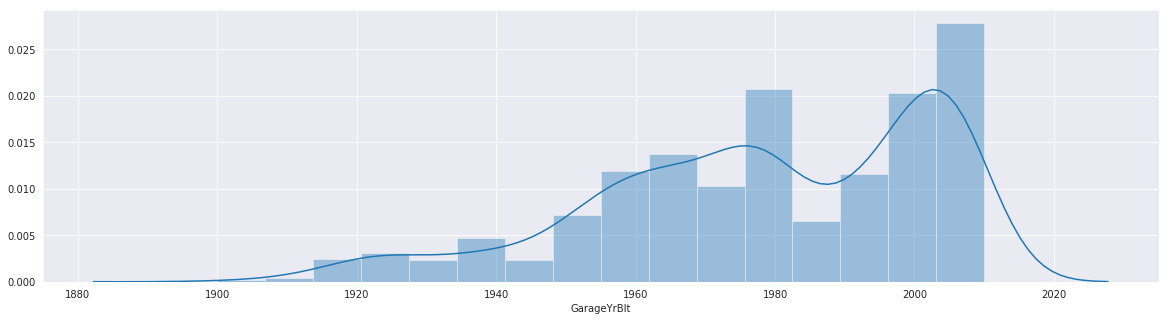

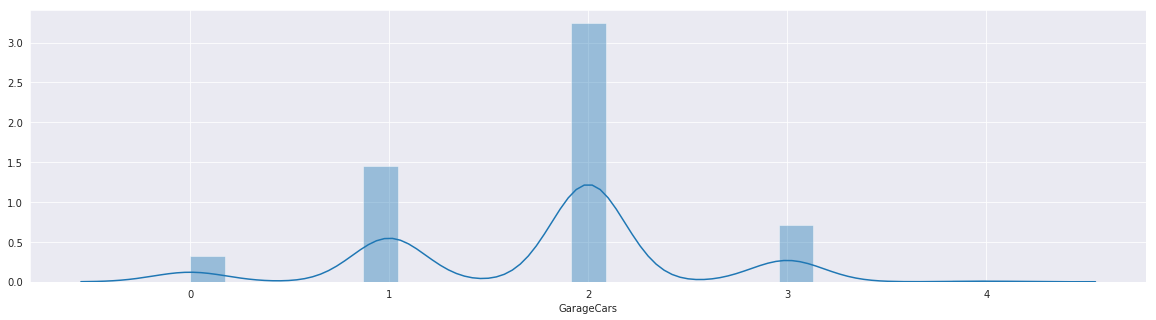

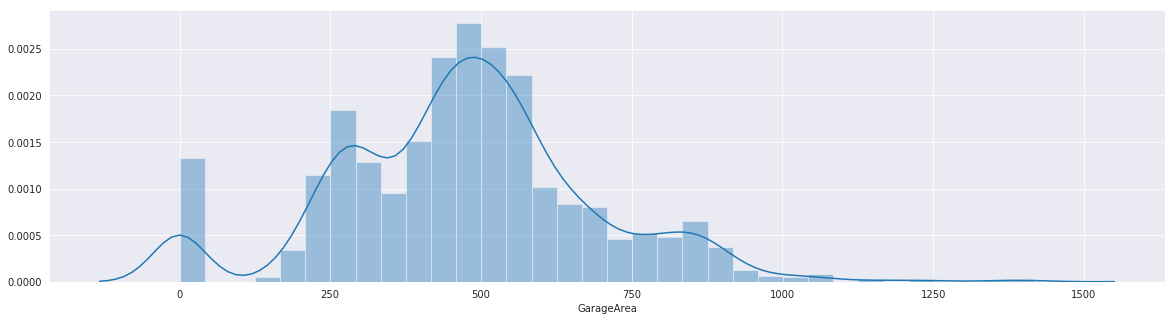

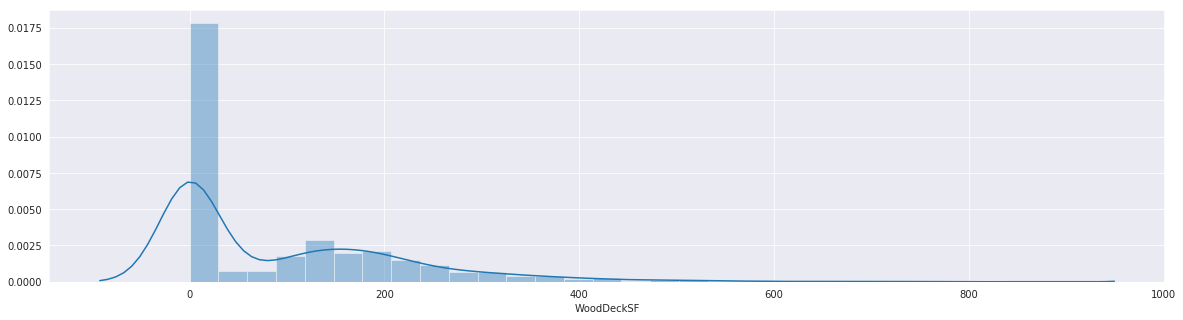

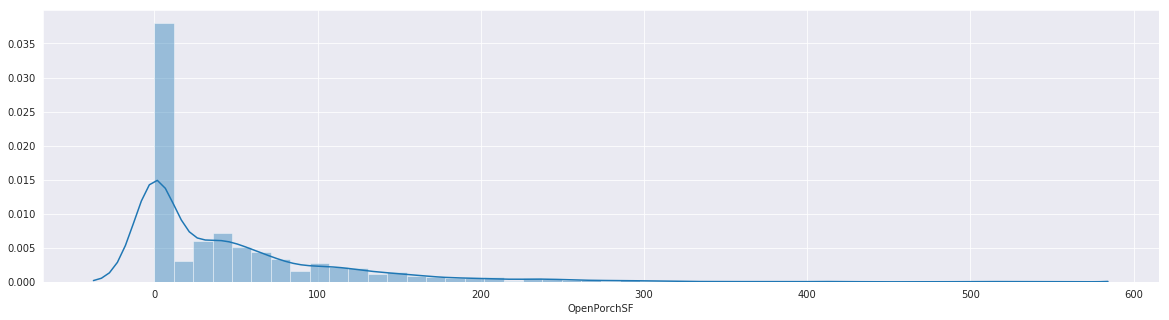

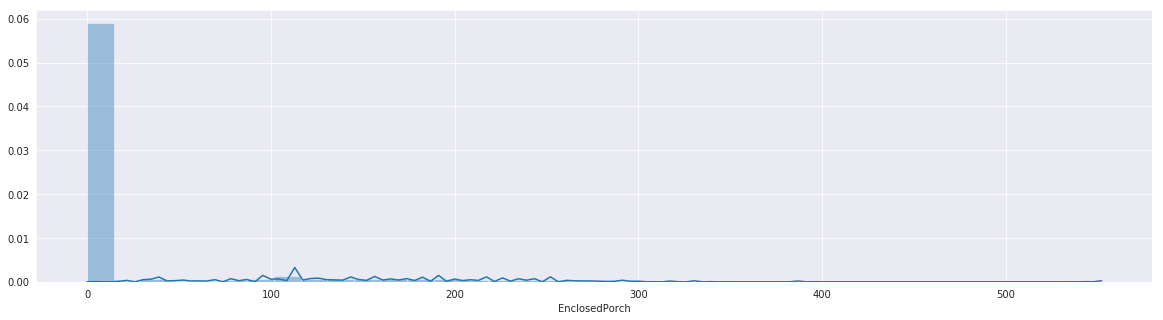

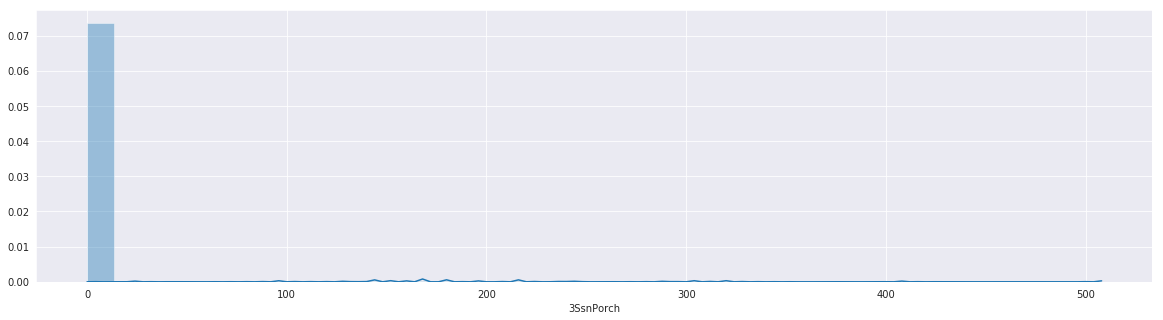

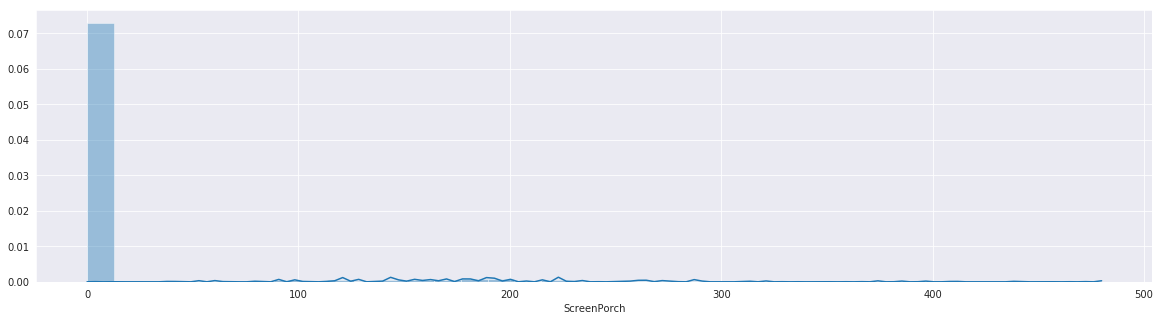

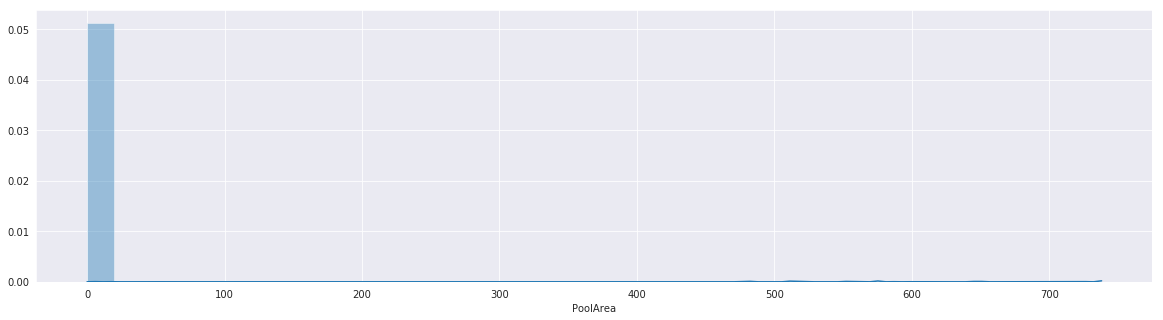

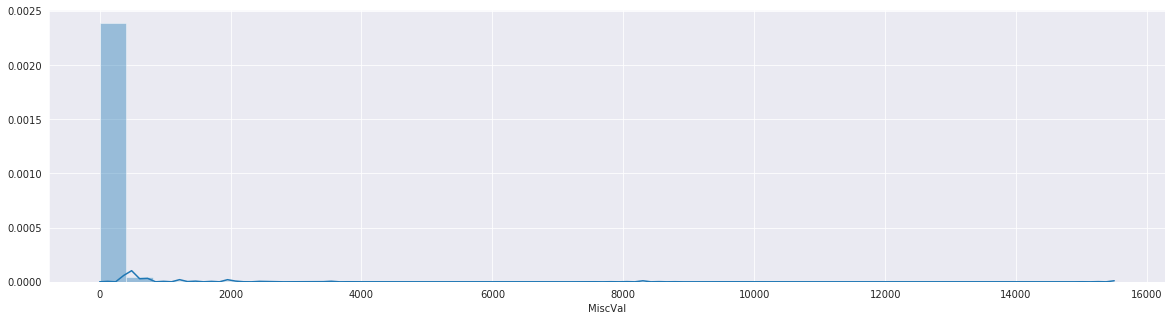

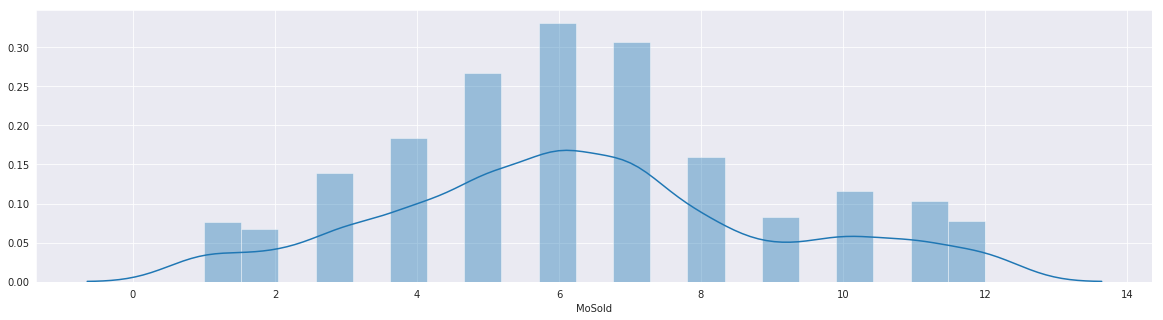

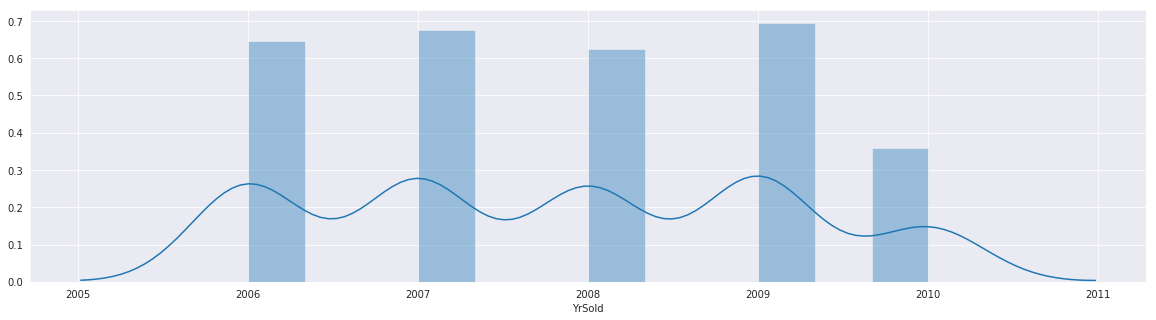

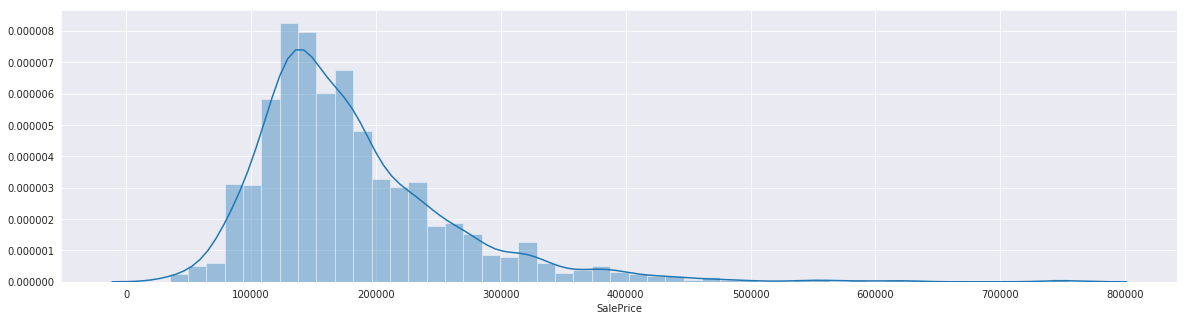

In [16]:
Distribuition_Numerical_Variables(Data, Num_List)

In [17]:
def Plot_Categorical_Variable_Relation(Data, List_Data):
    for Col in List_Data:
        plt.figure(figsize = (20, 5))
        plt.title(Col)
        sns.barplot(Data[Col], Data["SalePrice"])
        plt.show()

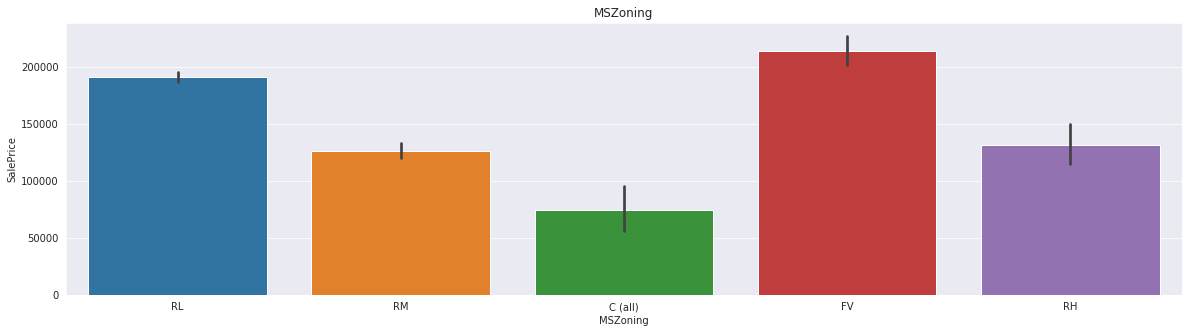

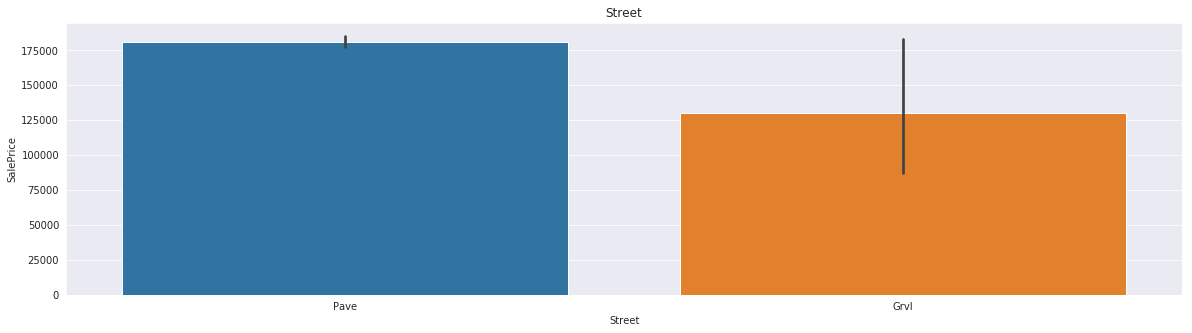

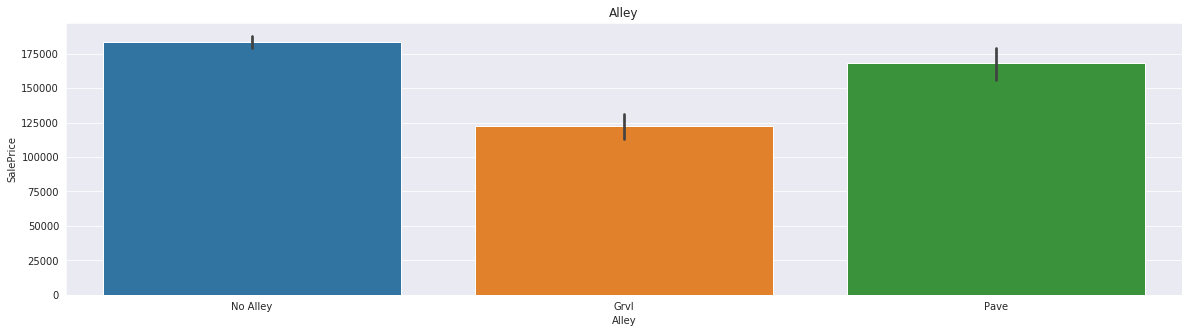

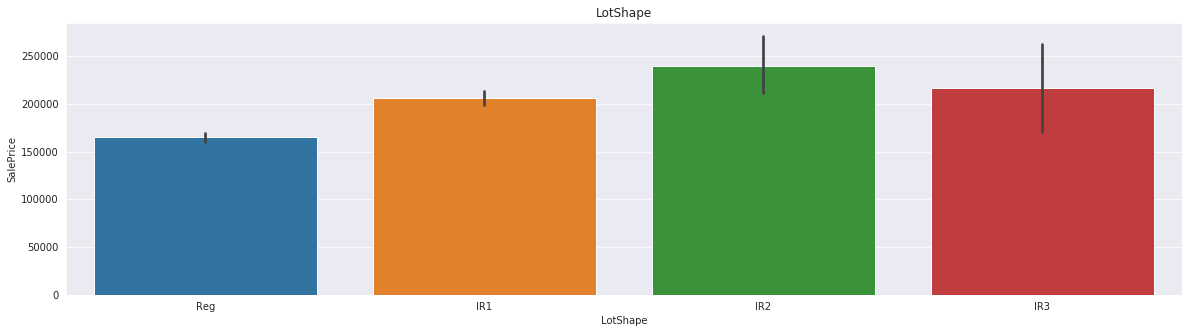

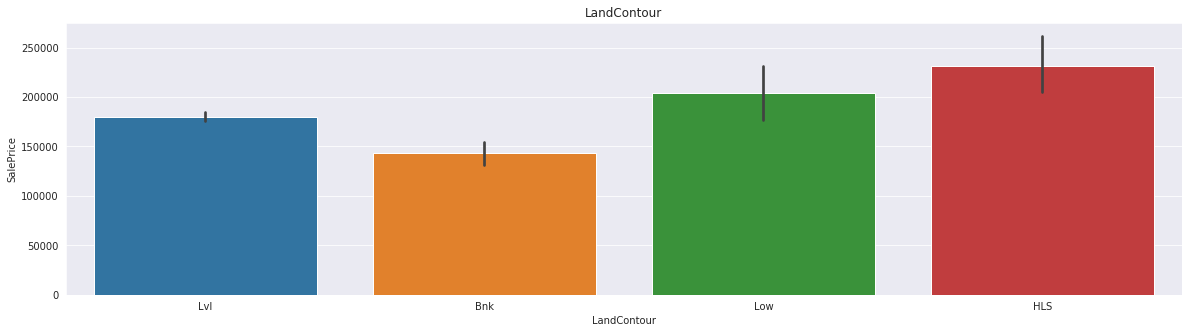

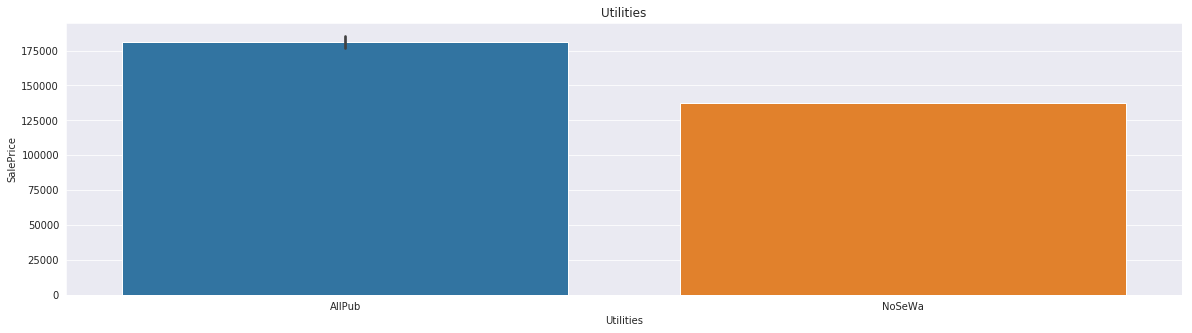

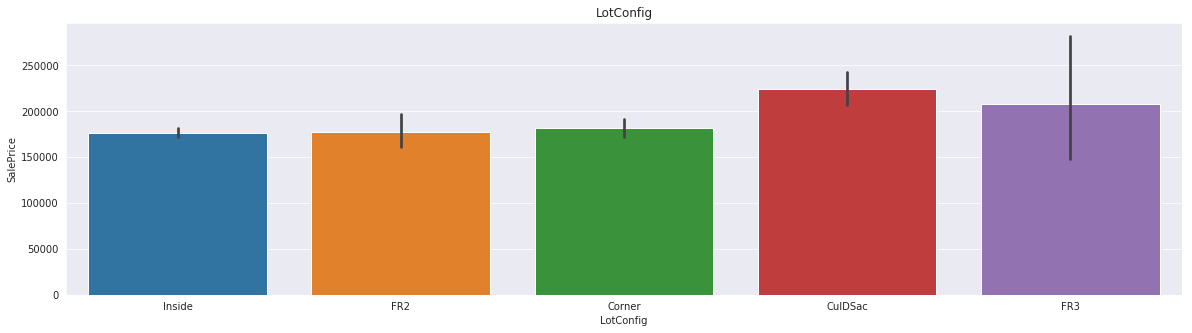

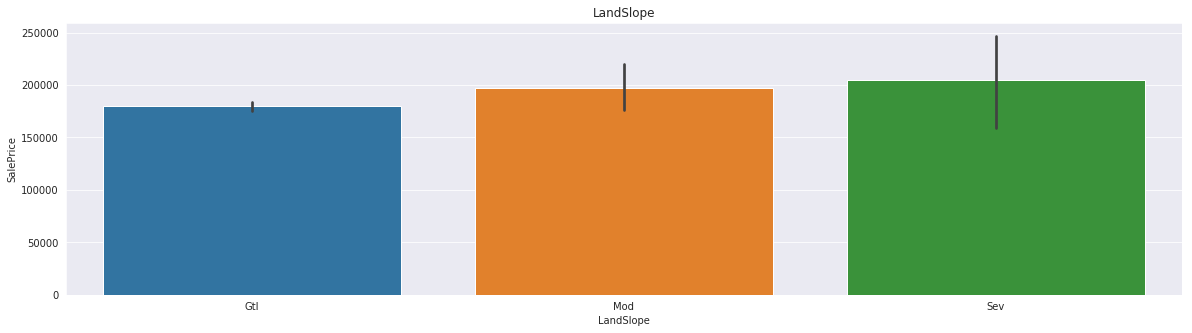

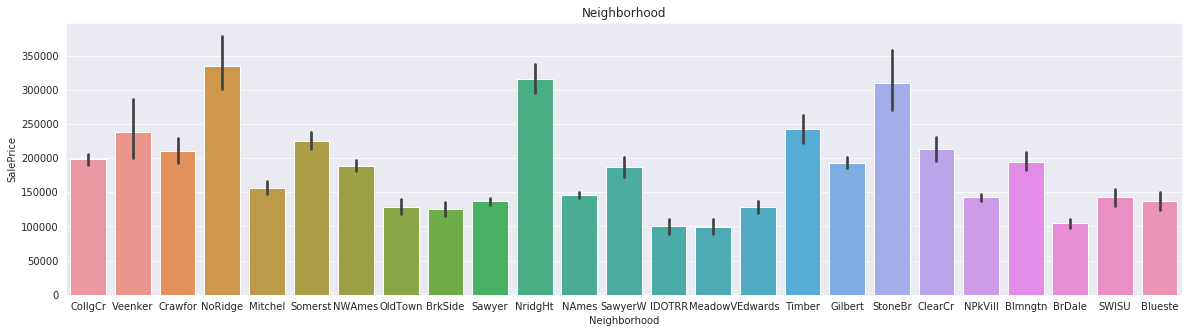

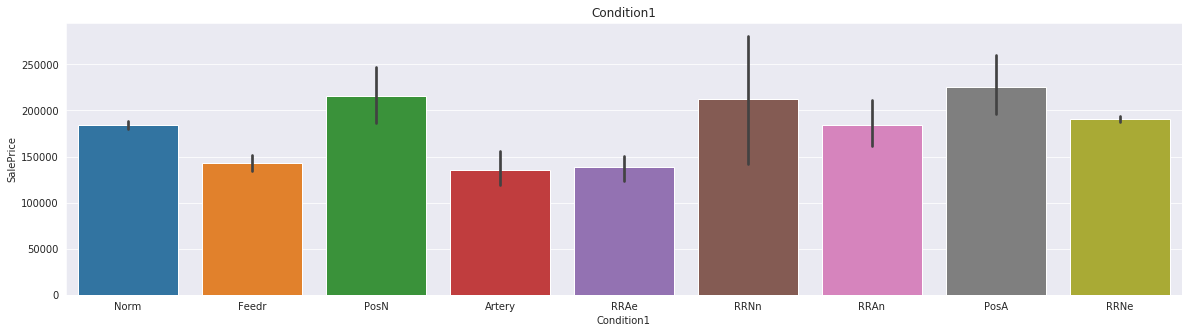

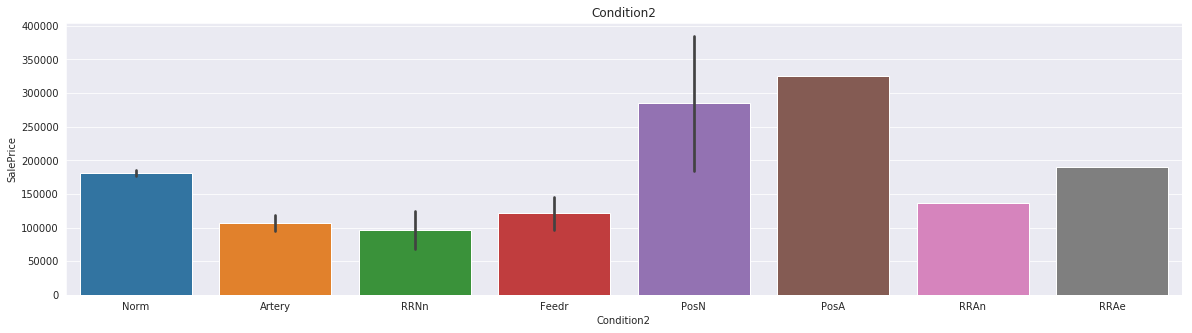

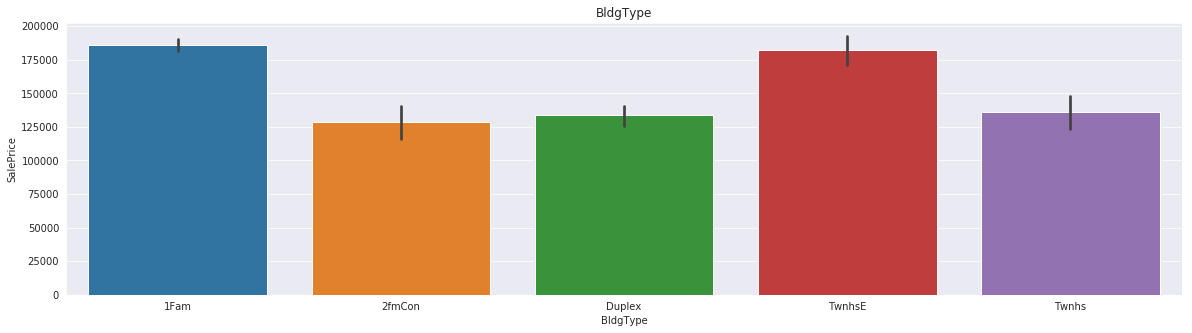

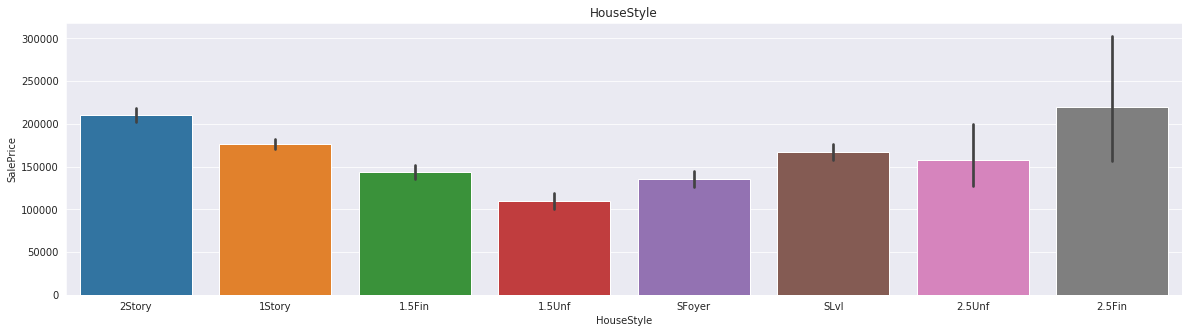

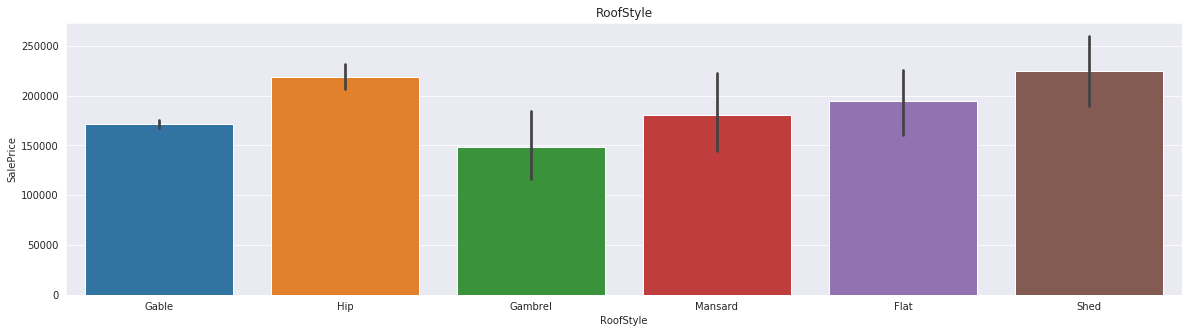

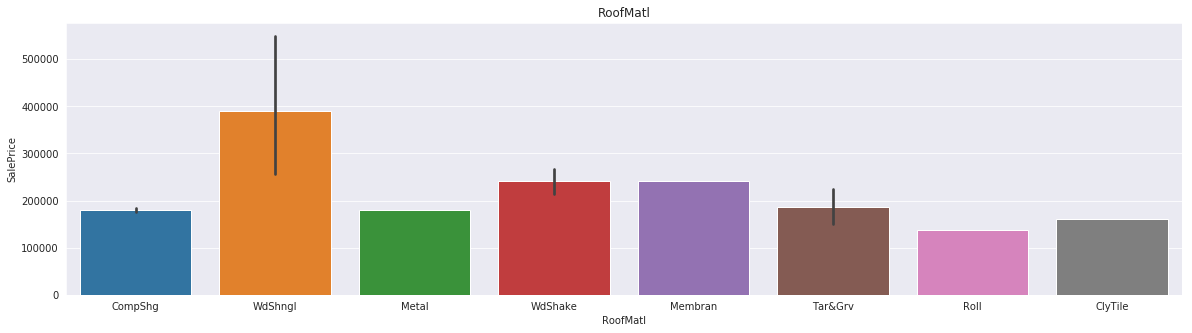

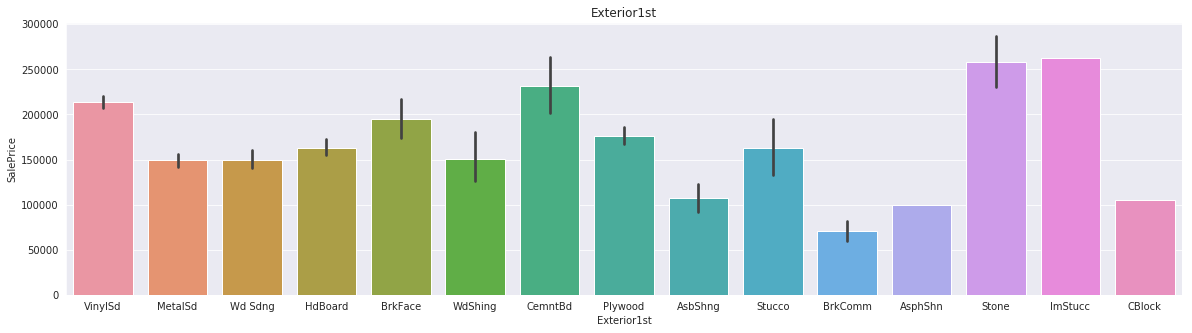

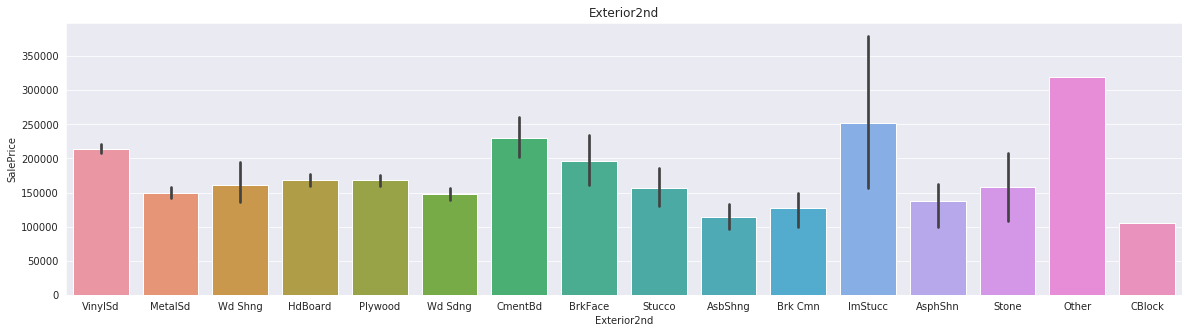

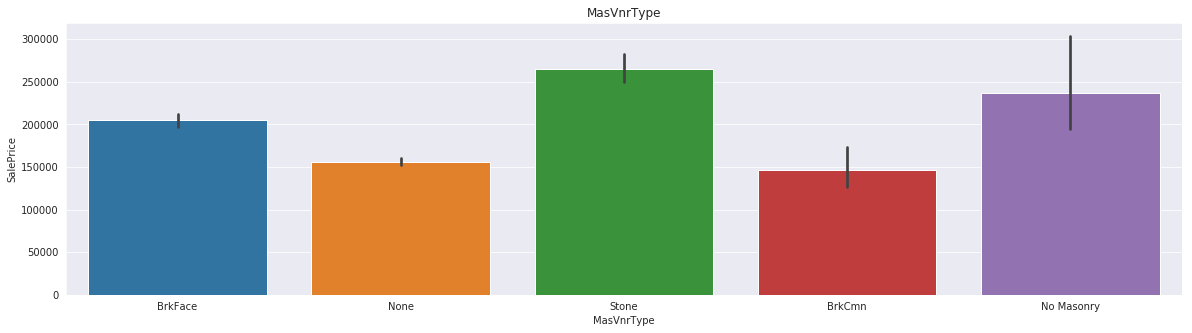

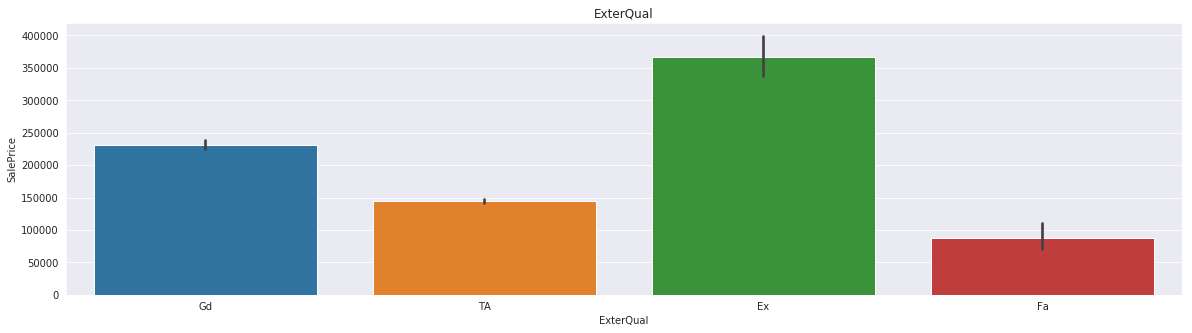

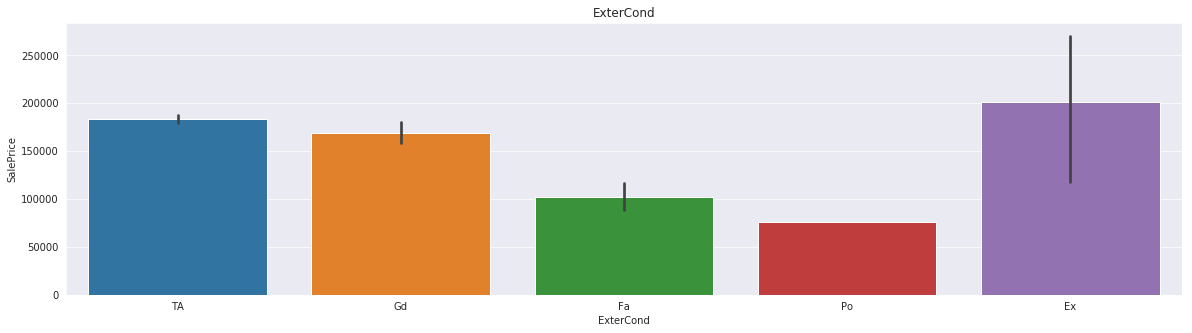

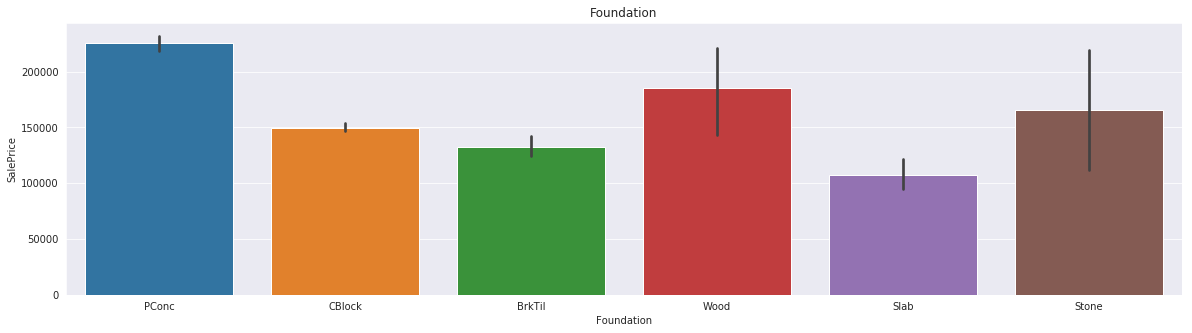

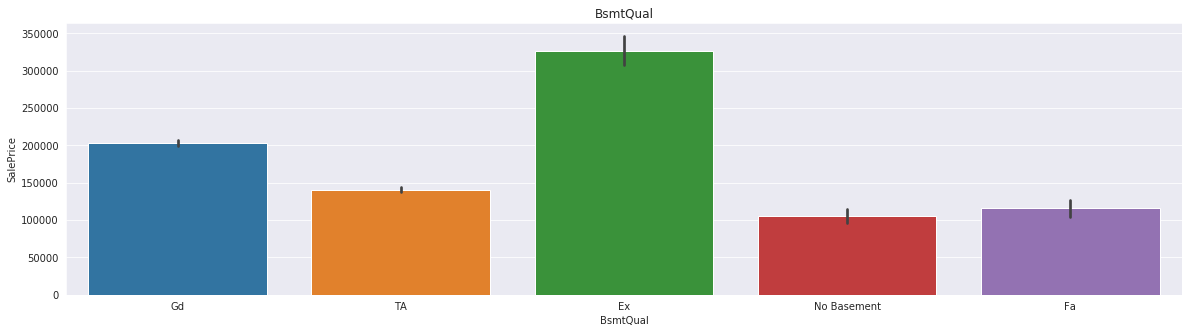

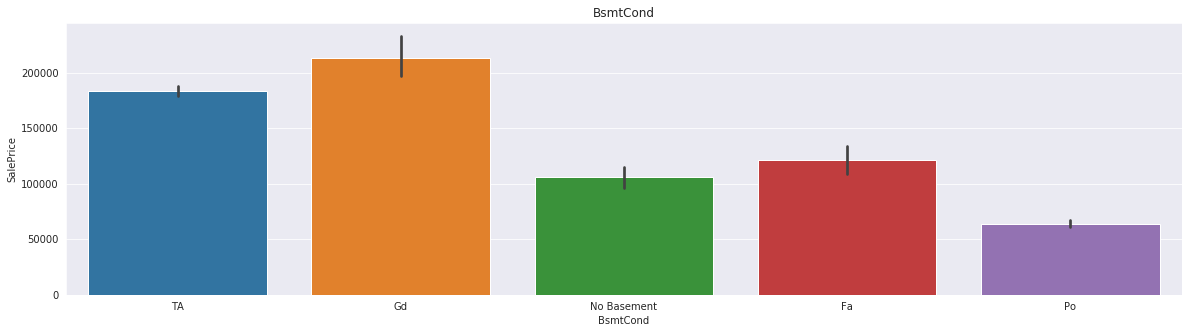

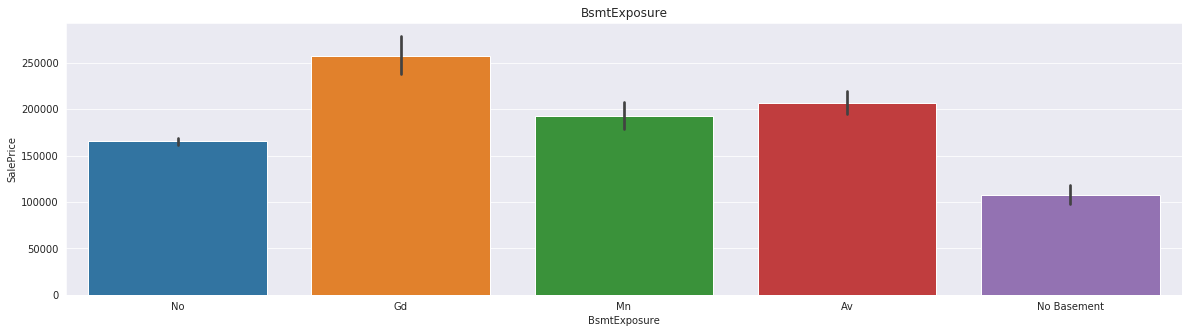

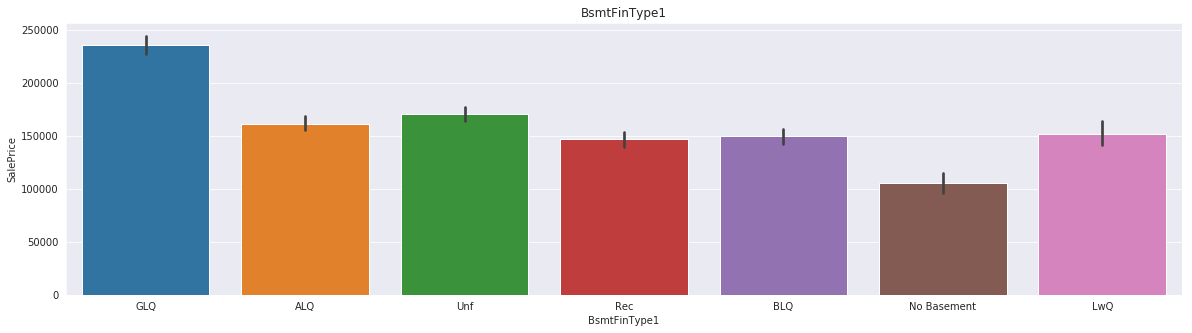

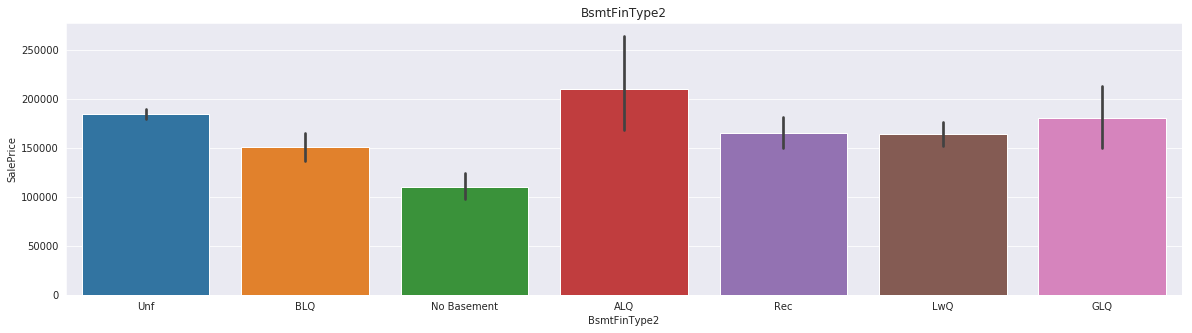

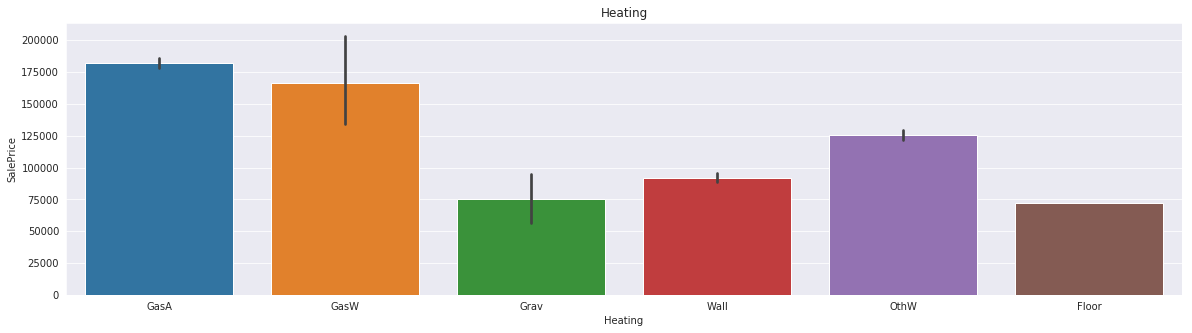

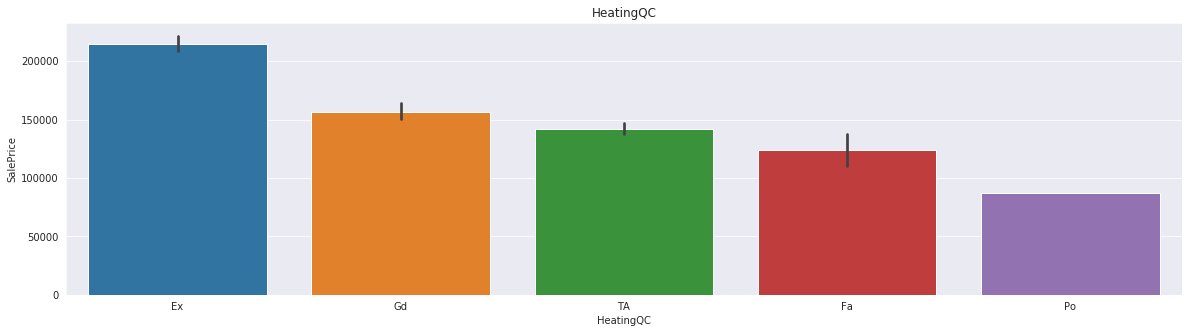

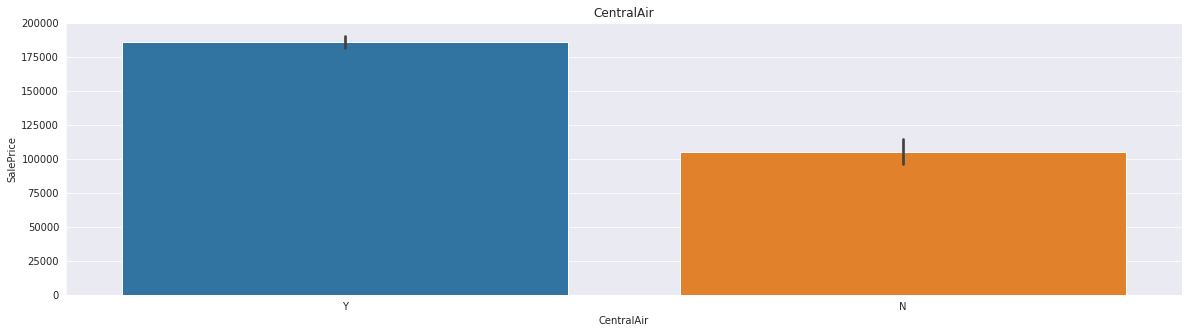

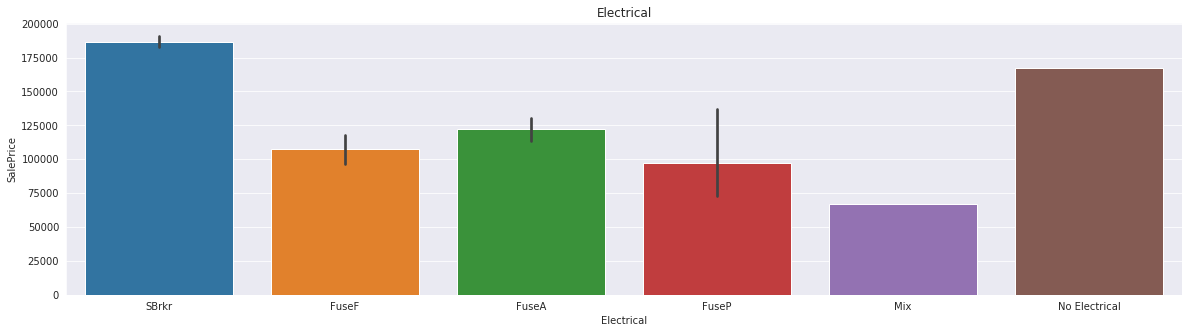

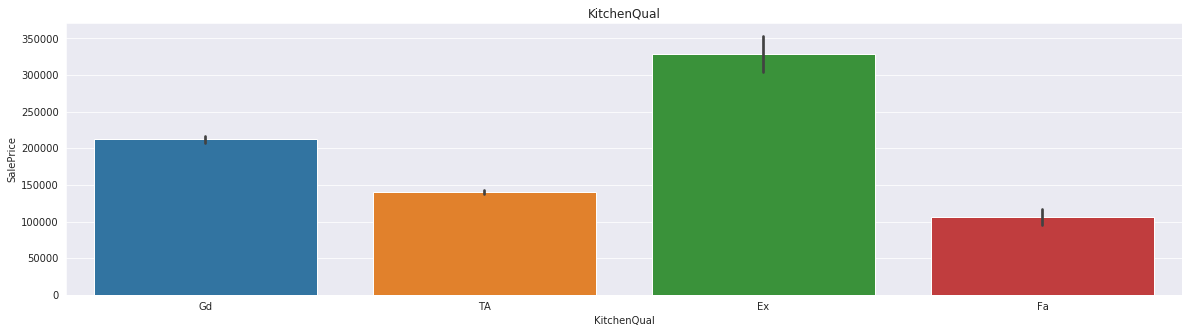

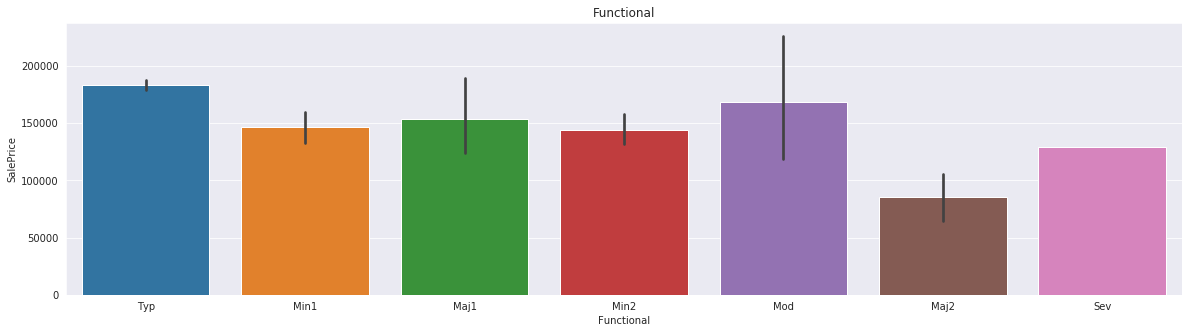

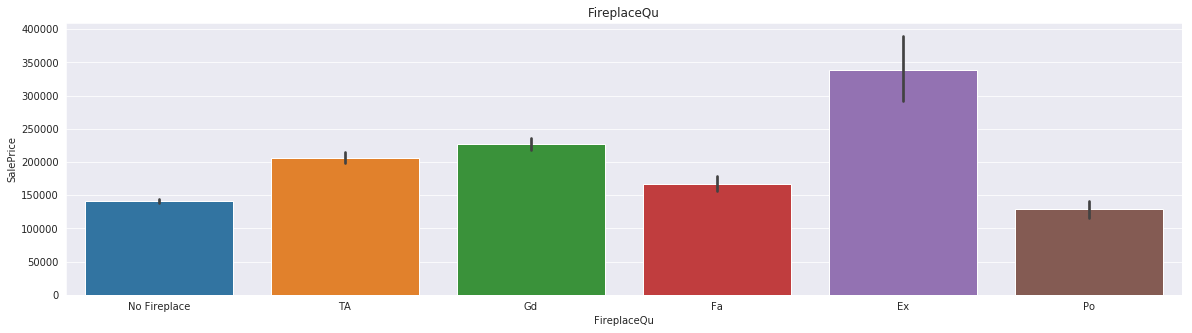

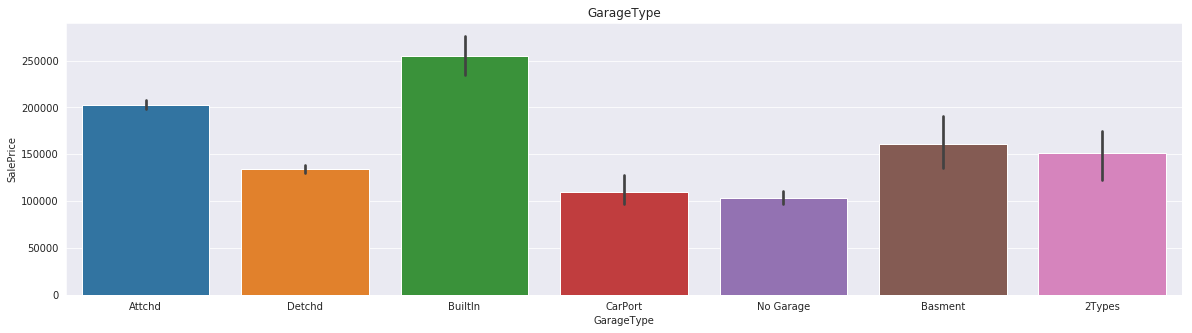

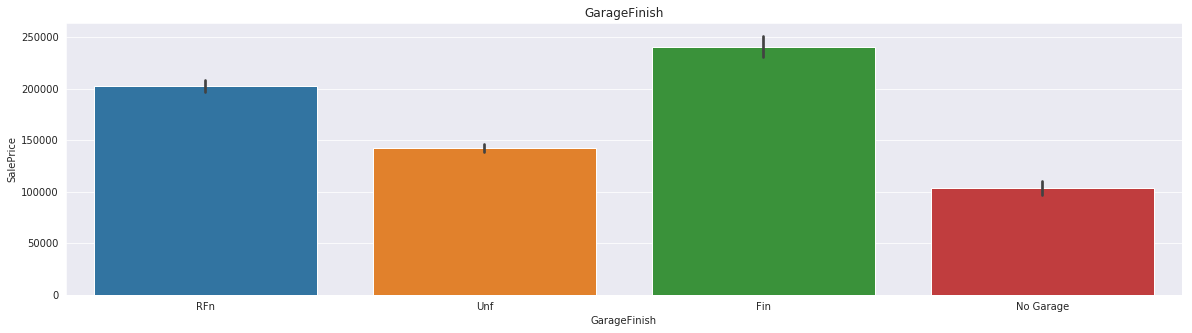

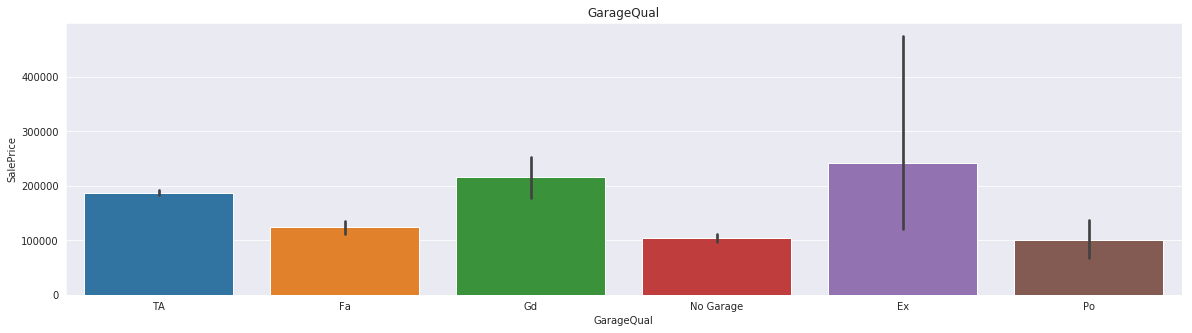

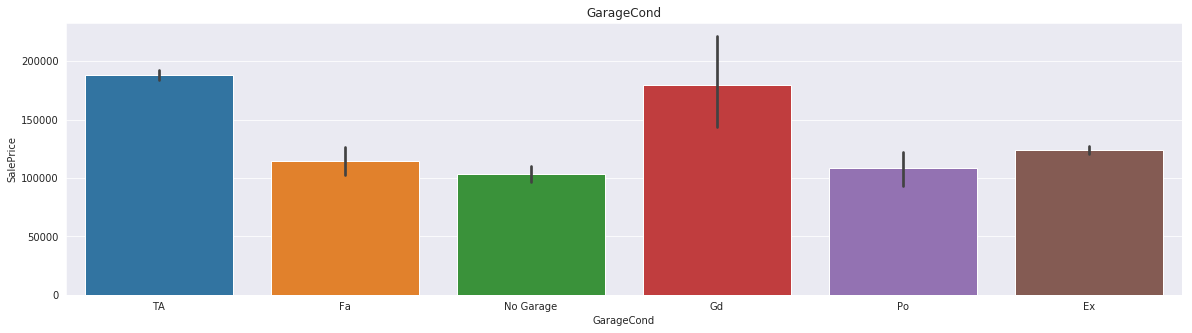

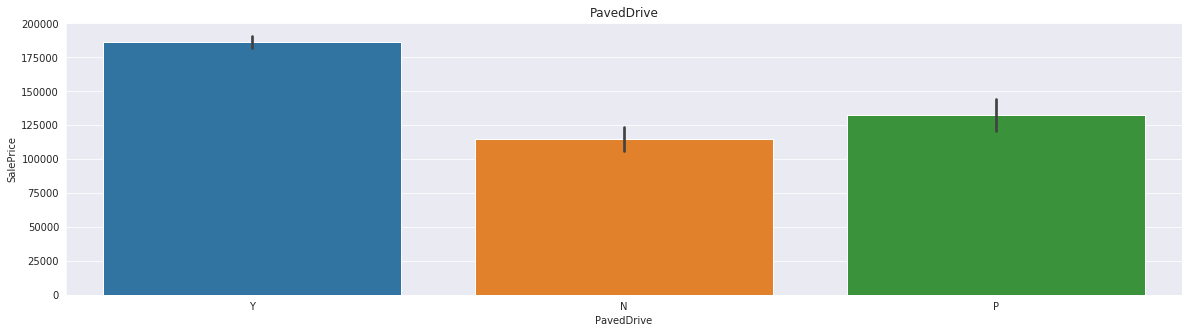

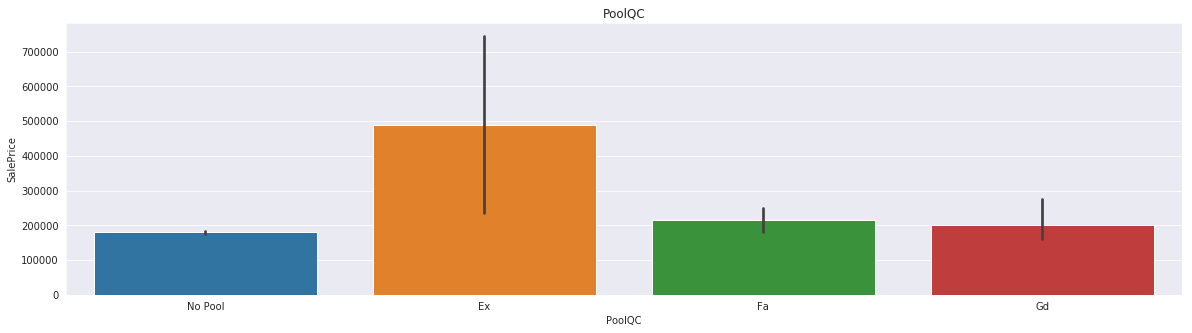

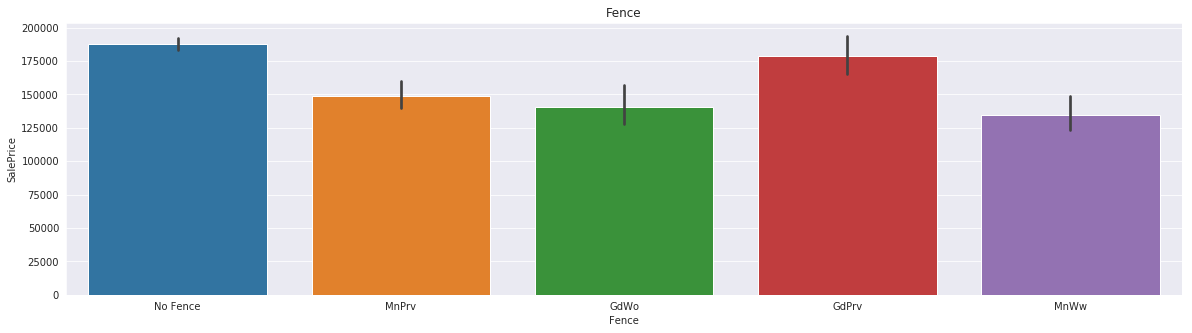

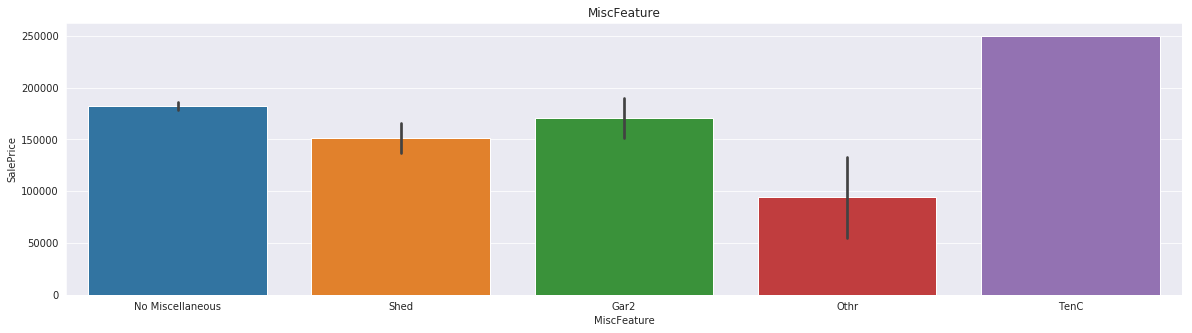

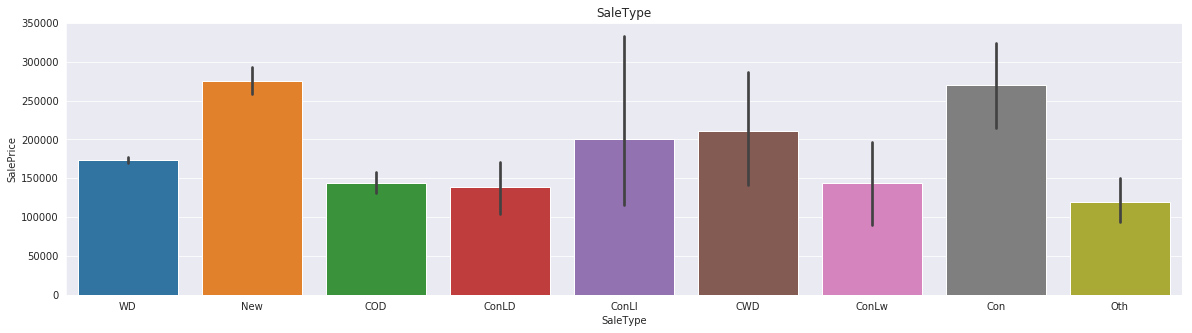

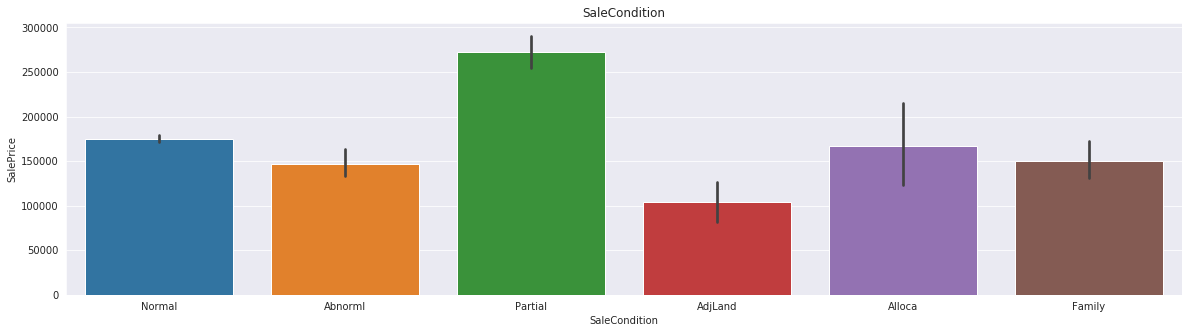

In [18]:
Plot_Categorical_Variable_Relation(Data, Cat_List)

In [19]:
def Plot_Numerical_Variable_Relation(Data, List_Data):
    for Col in List_Data:
        plt.figure(figsize = (20, 5))
        plt.title(Col)
        sns.scatterplot(Data[Col], Data["SalePrice"])
        plt.show()

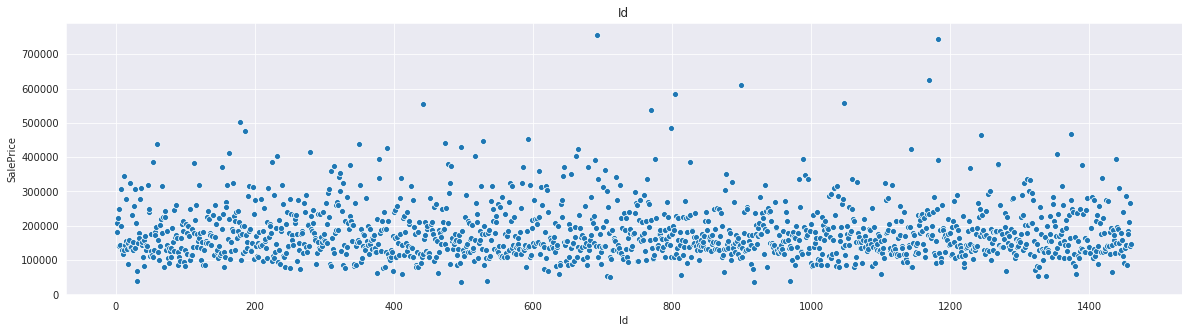

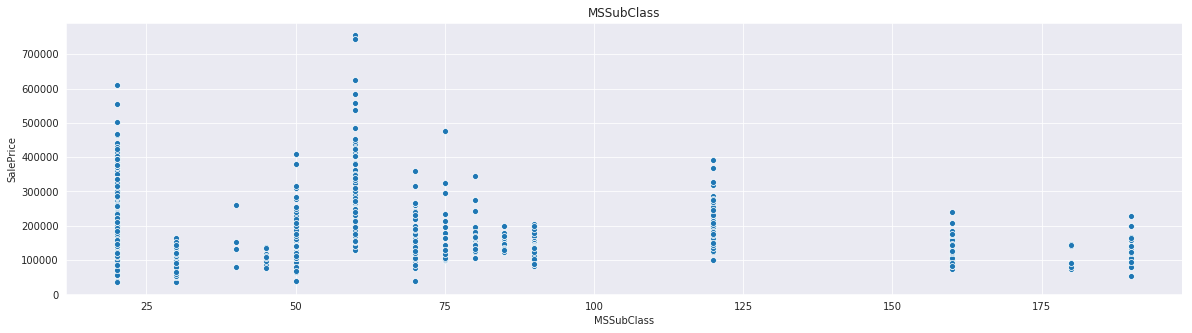

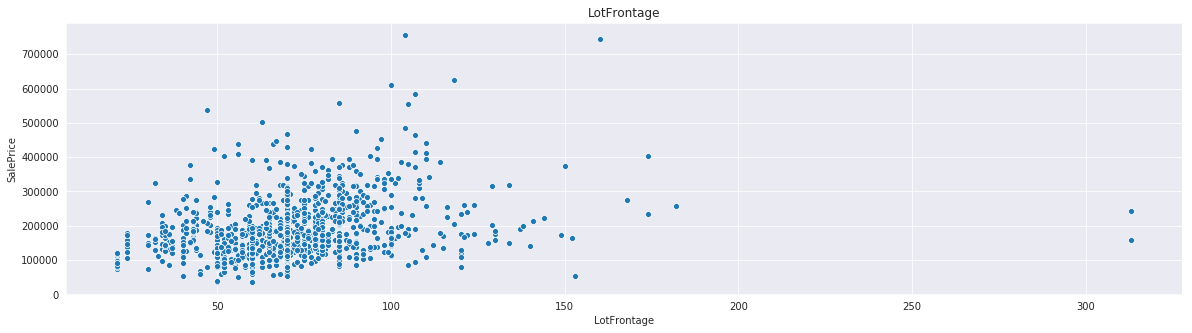

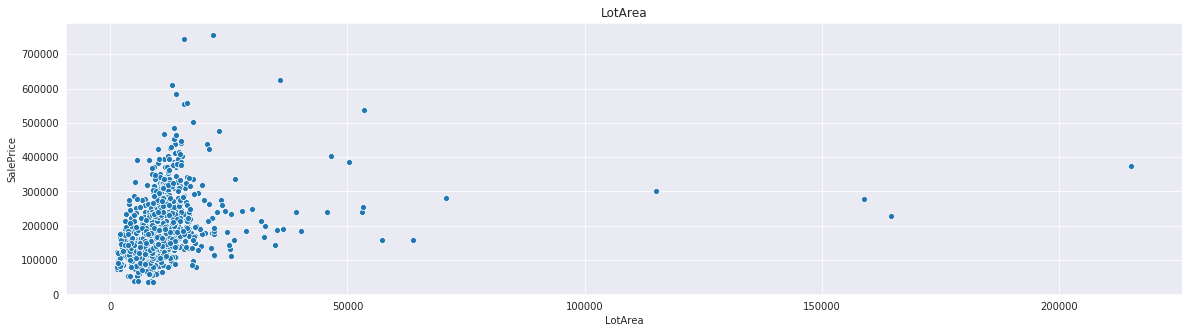

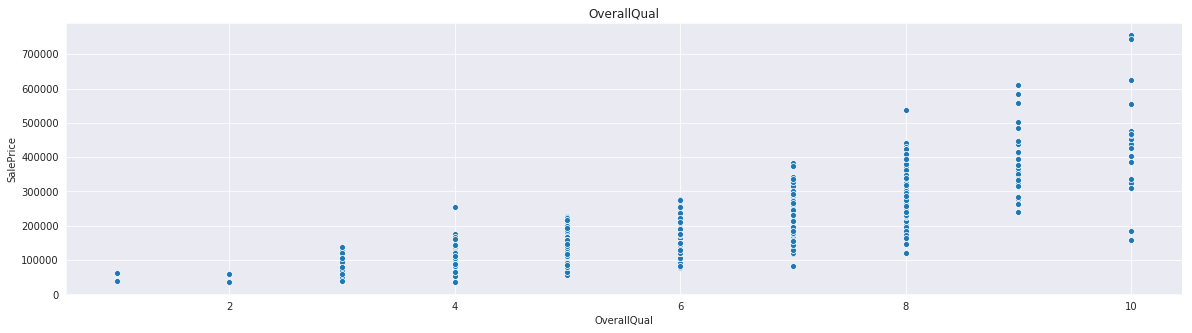

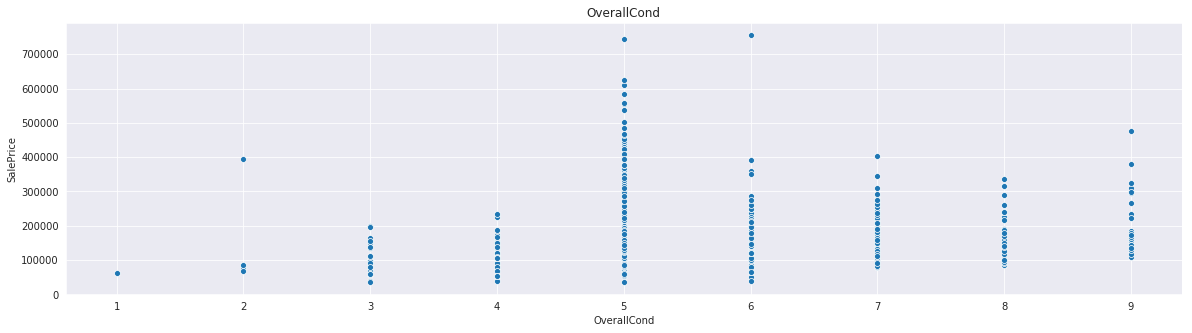

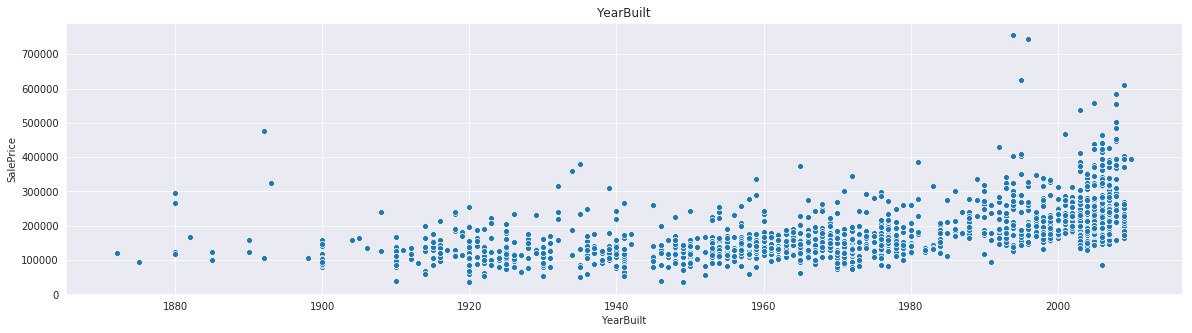

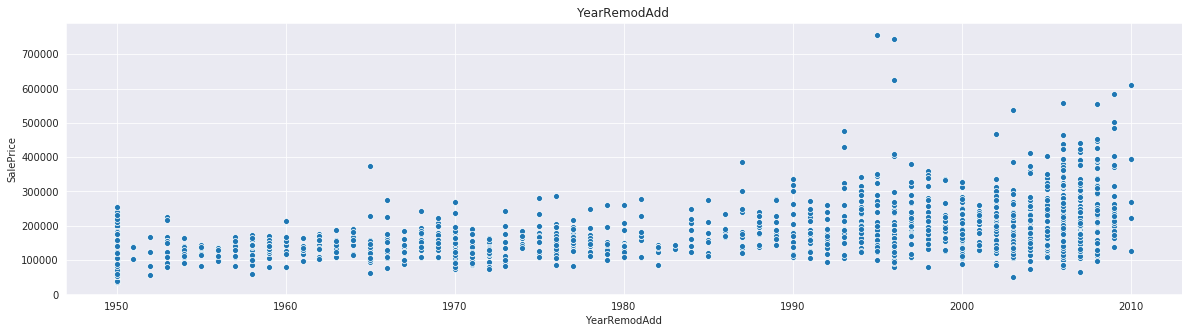

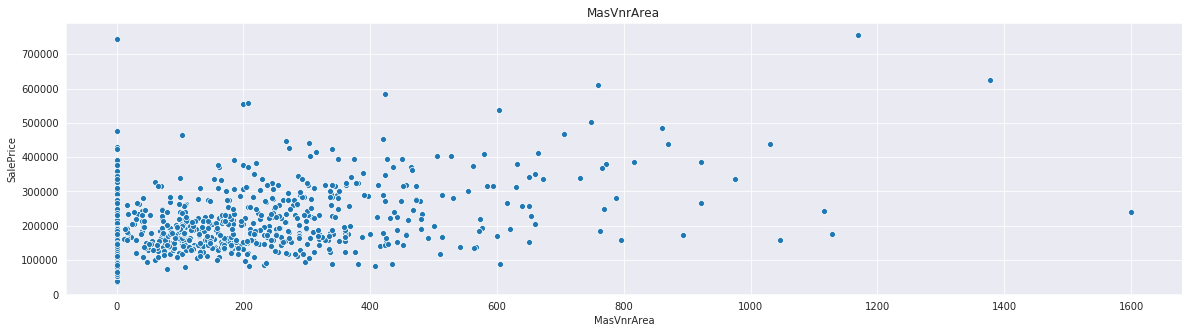

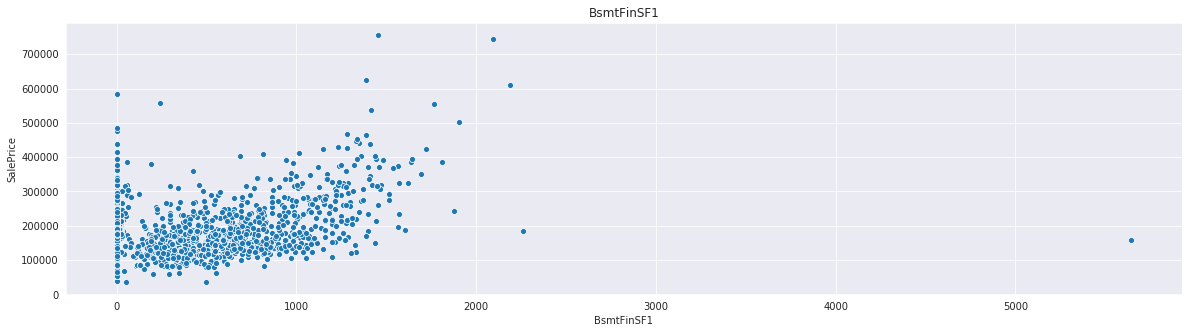

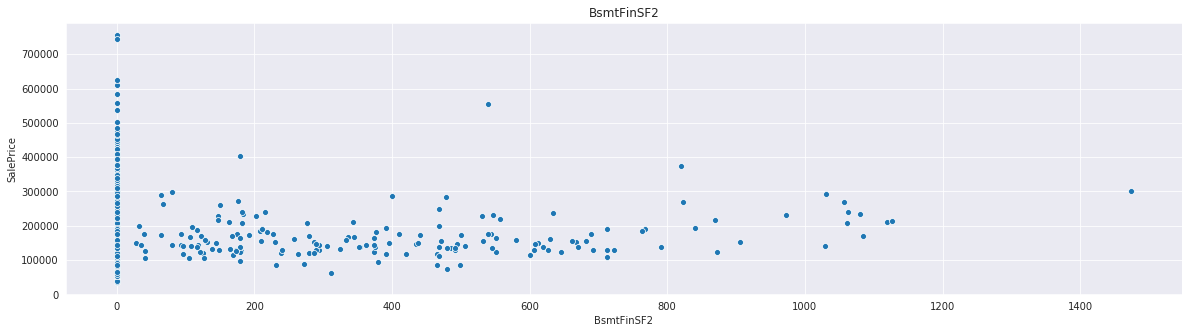

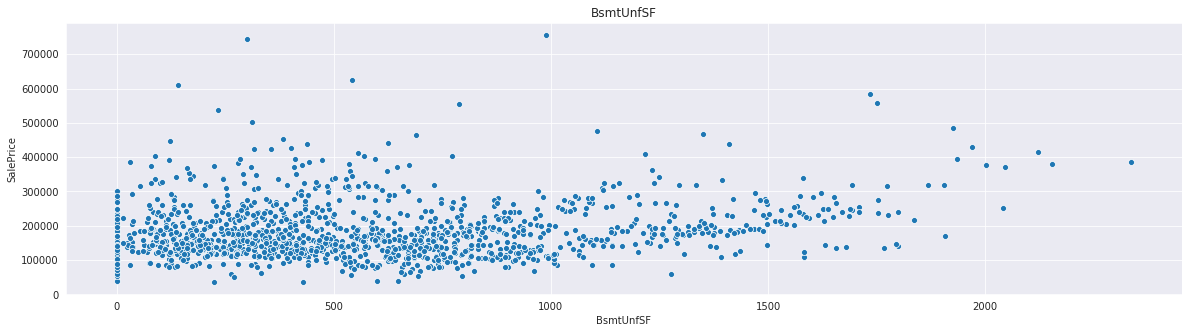

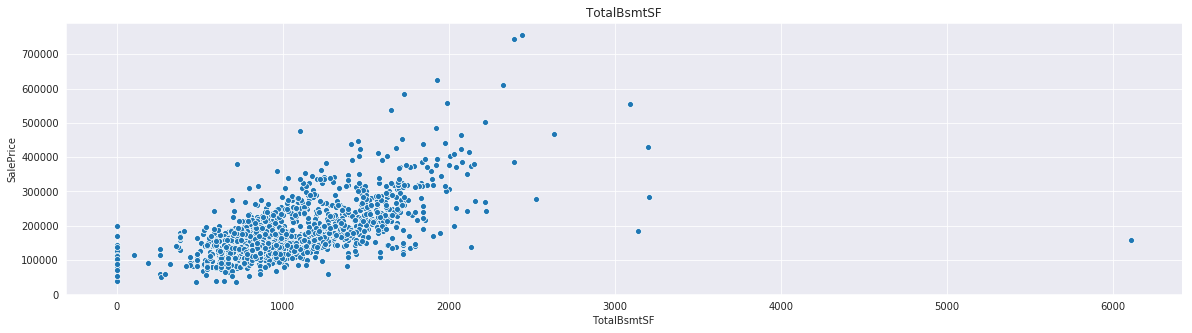

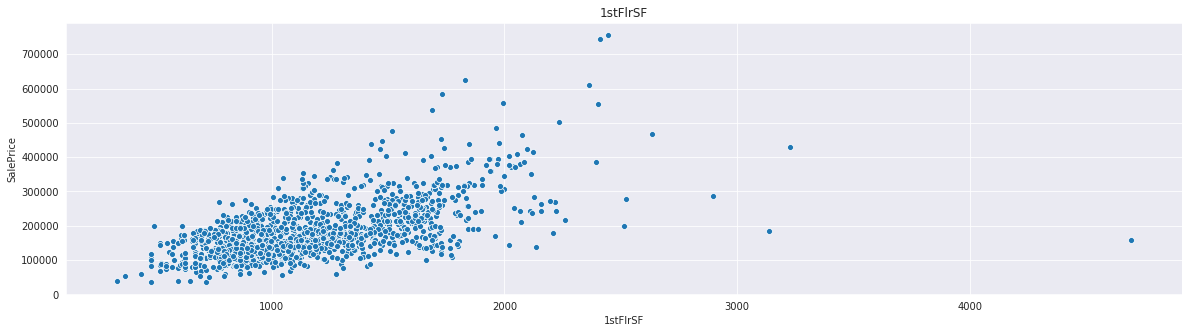

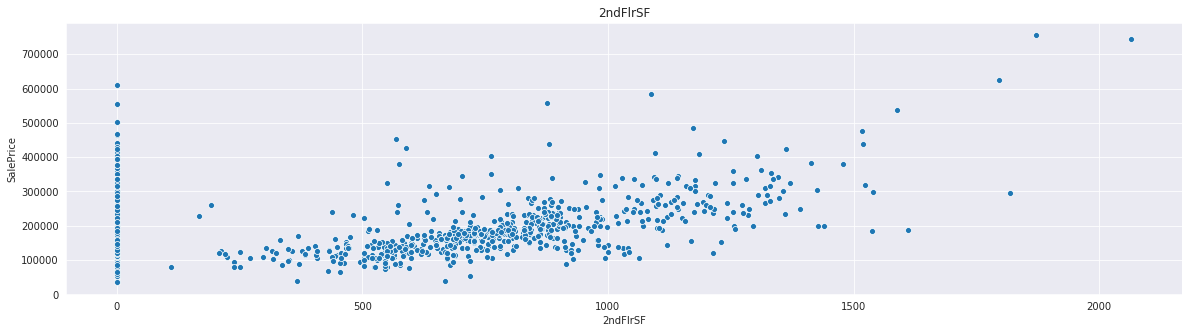

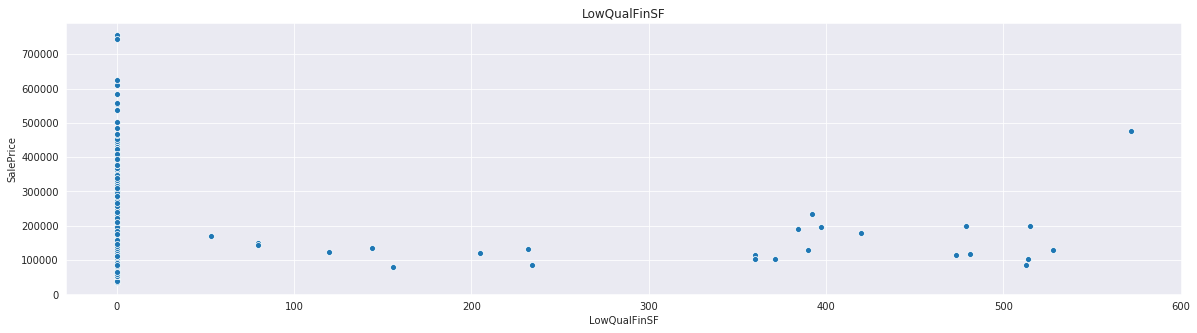

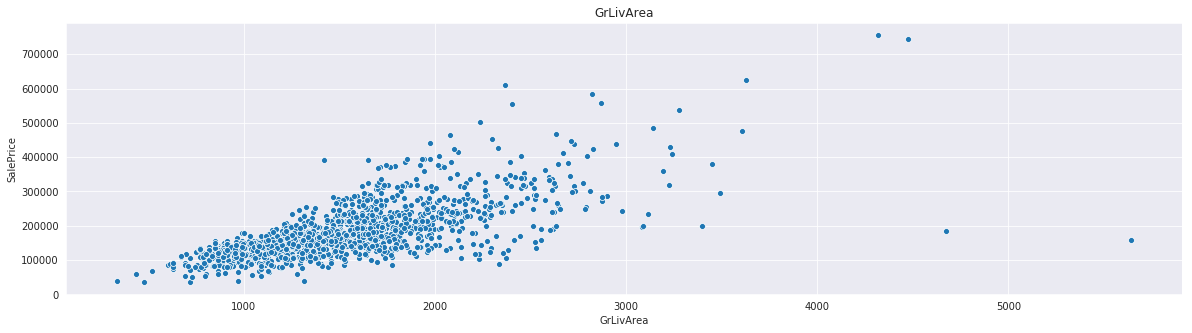

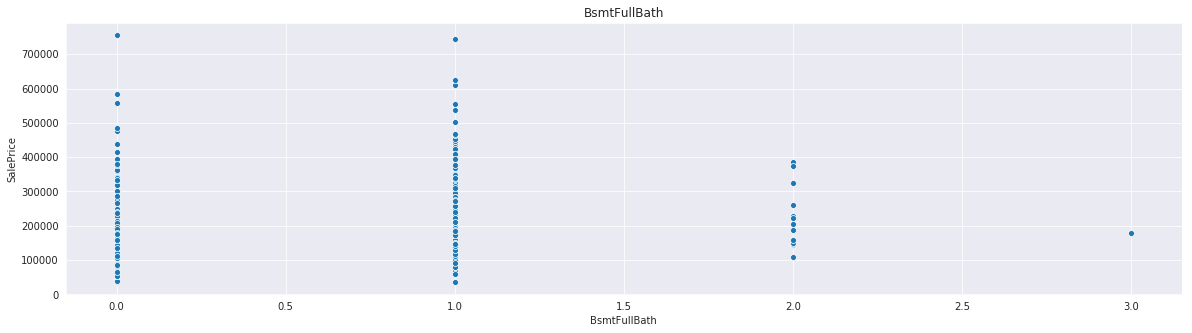

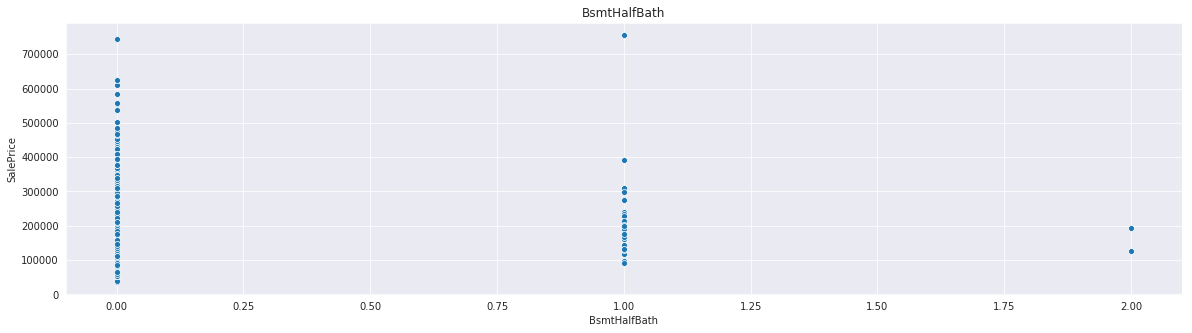

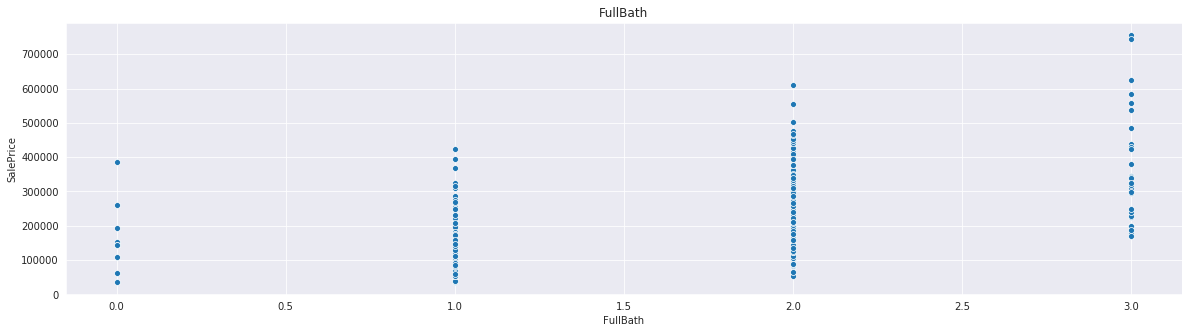

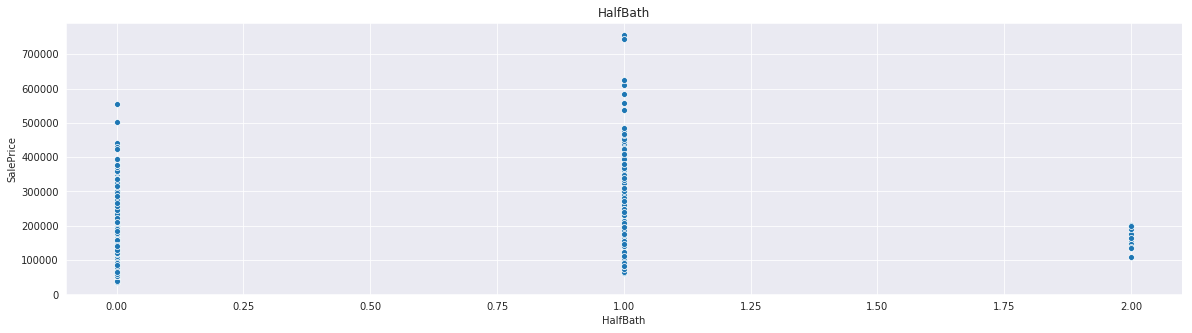

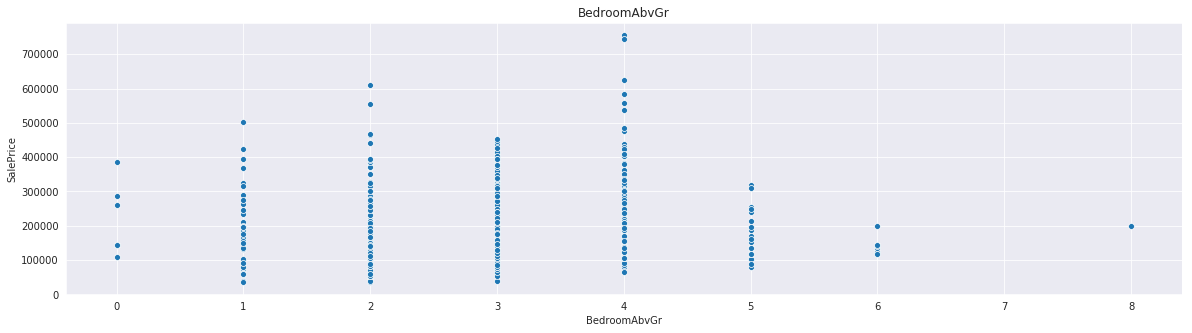

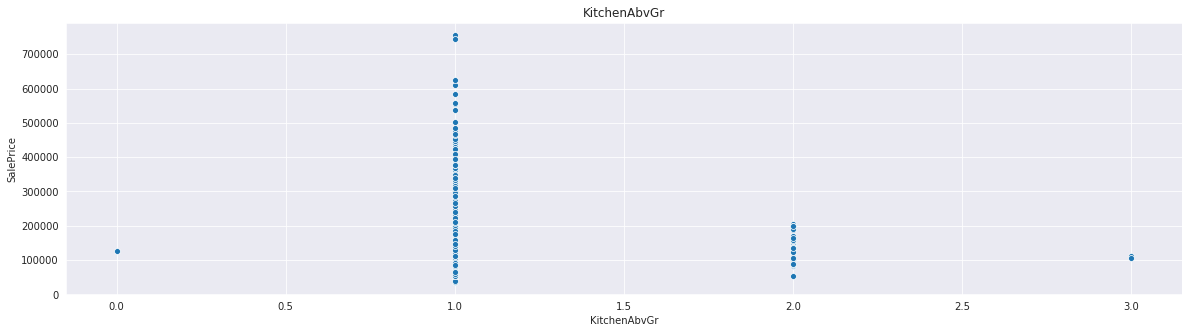

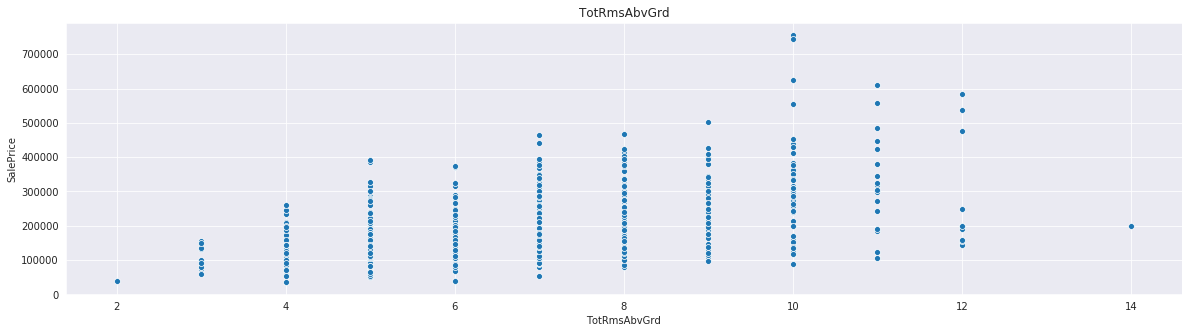

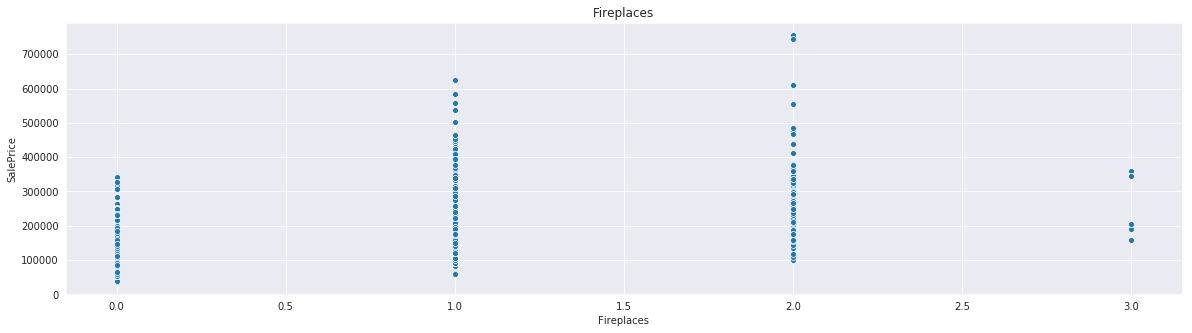

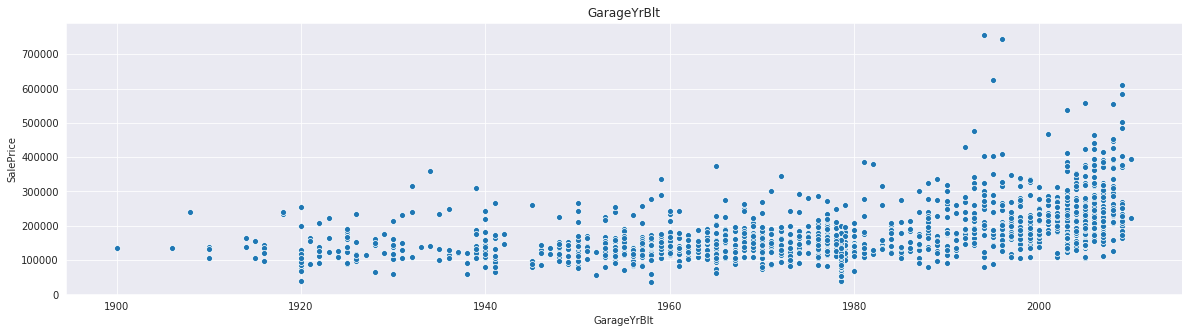

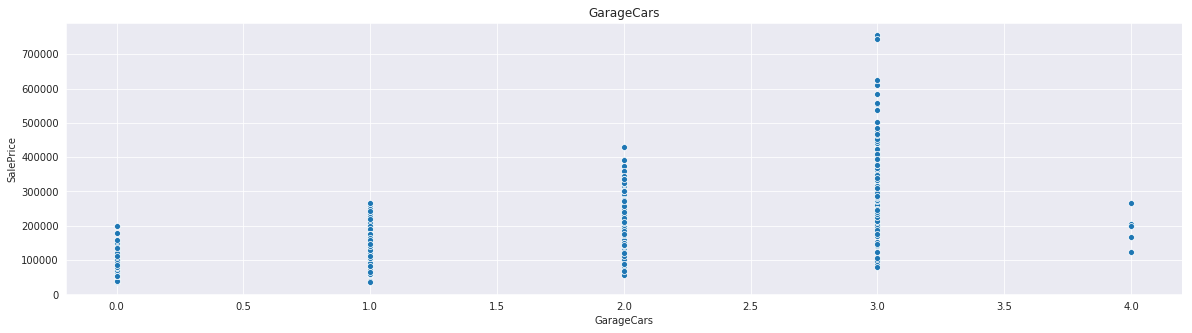

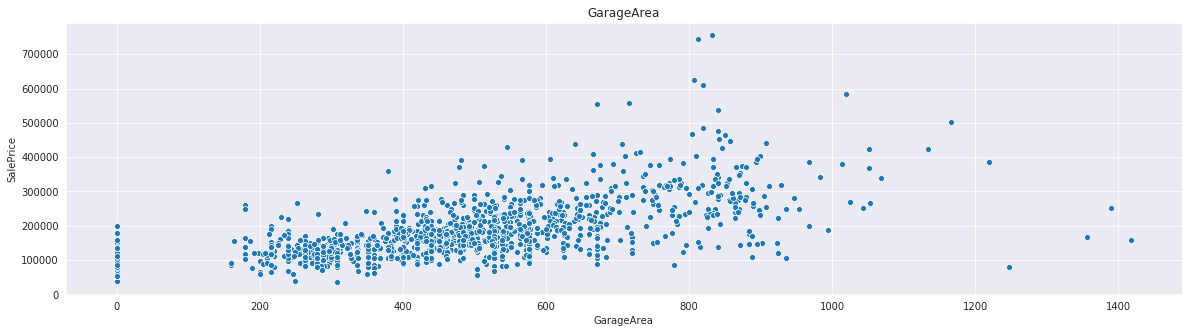

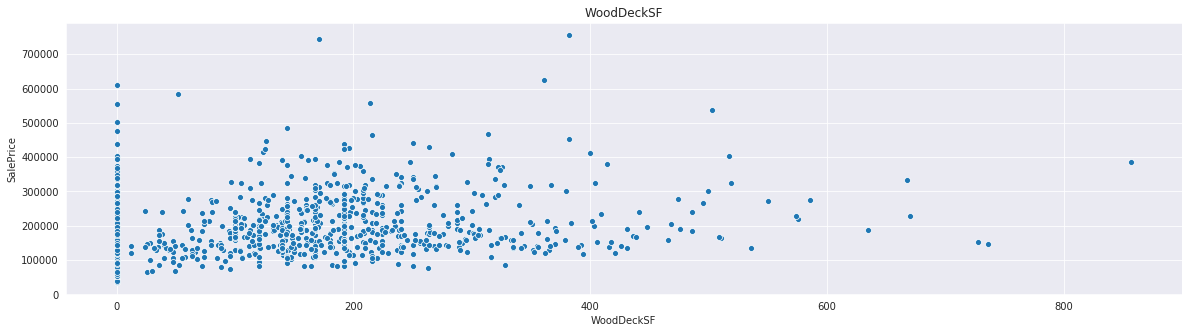

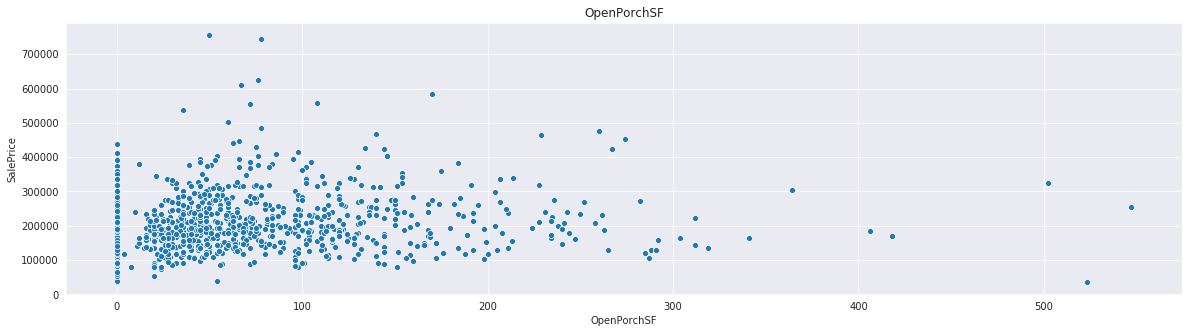

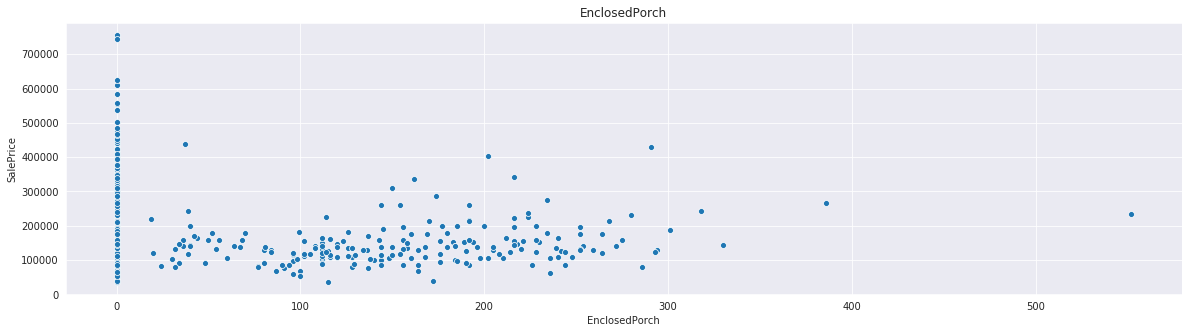

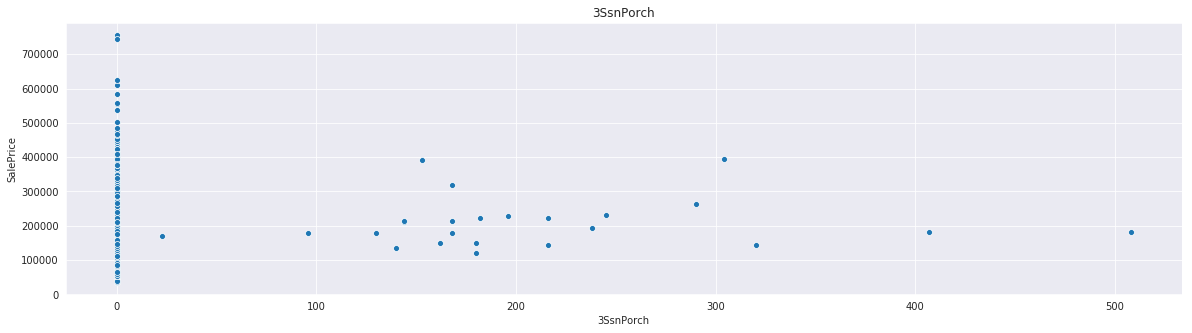

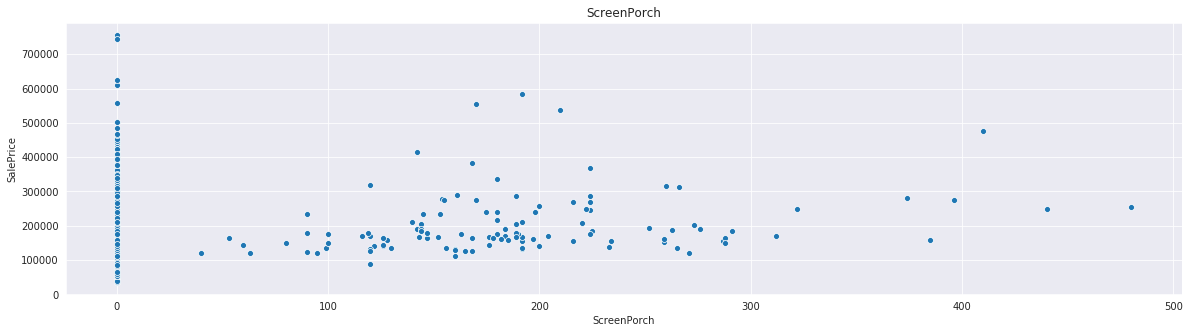

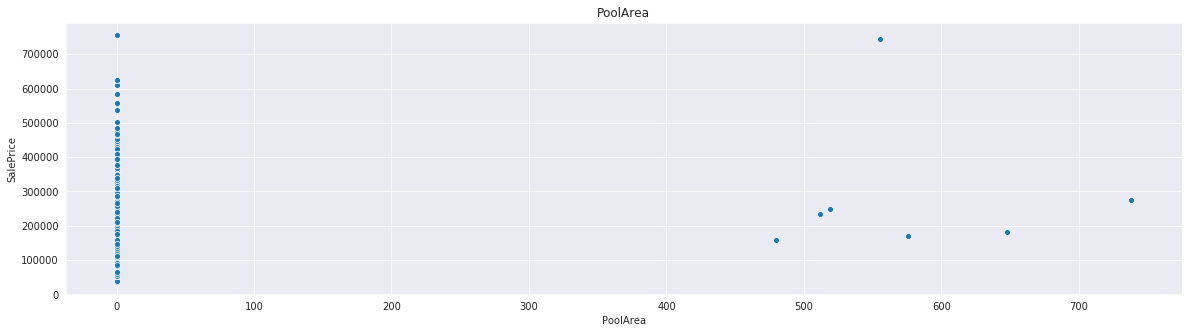

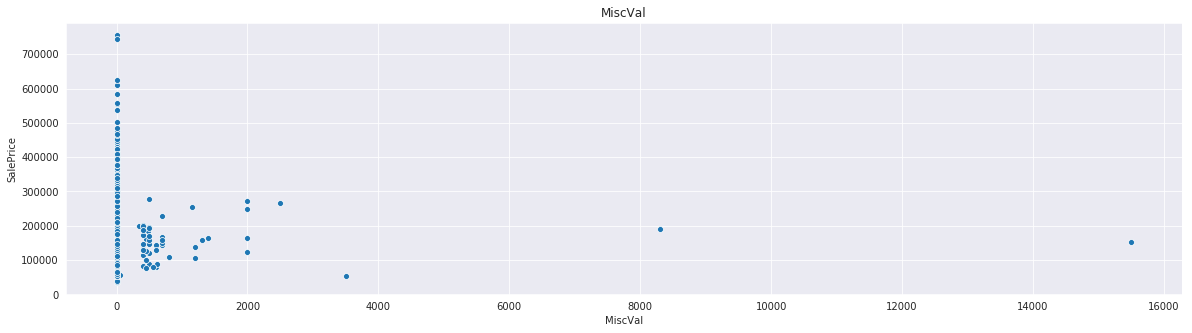

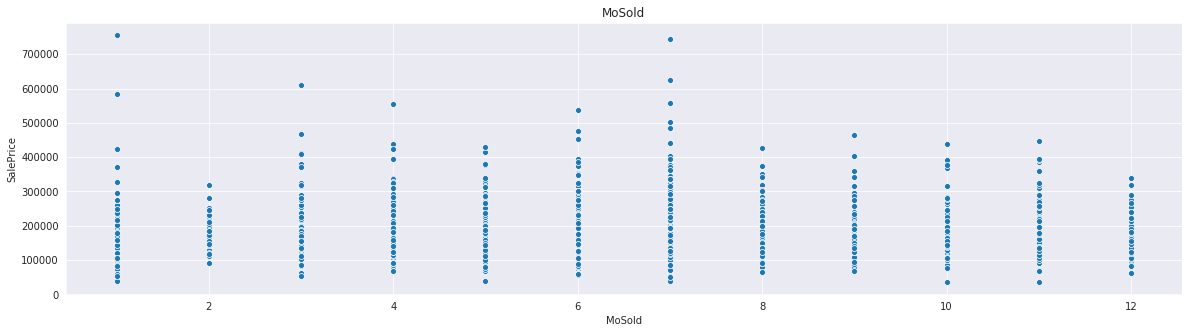

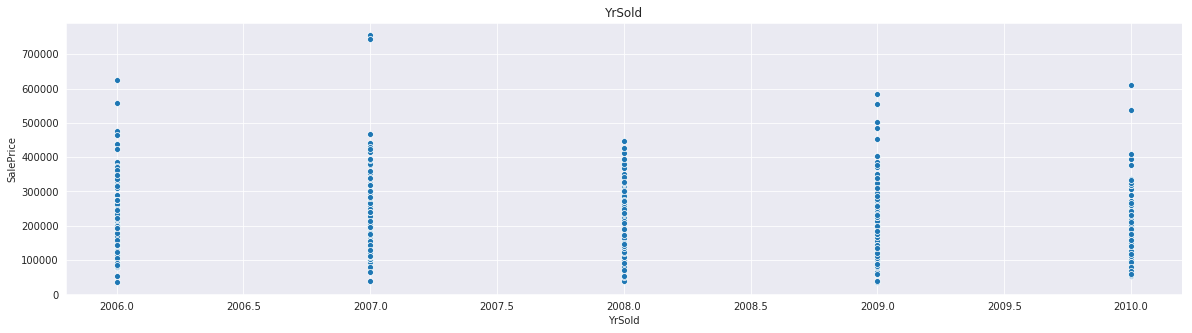

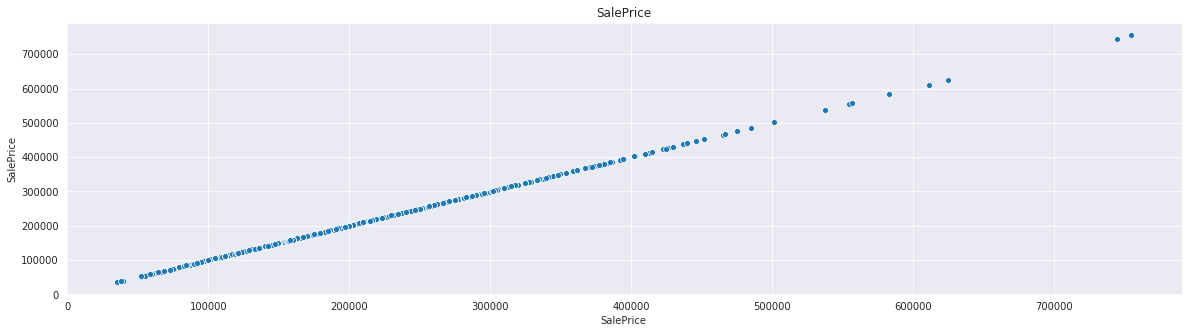

In [20]:
Plot_Numerical_Variable_Relation(Data, Num_List)

# TRANSFORMAÇÃO DAS VARIÁVEIS

In [21]:
Data["SalePrice"] = np.log1p(Data["SalePrice"])
Data["GrLivArea"] = np.log1p(Data["GrLivArea"])
Data["TotalBsmtSF"] = np.log1p(Data["TotalBsmtSF"])
Data["1stFlrSF"] = np.log1p(Data["1stFlrSF"])

In [22]:
pd.DataFrame(data = {"Correlacao": Data.corr()["SalePrice"]}).sort_values(by = "Correlacao", ascending = False)

,Correlacao
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.730254
GarageCars,0.680625
GarageArea,0.650888
1stFlrSF,0.608955
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608
TotRmsAbvGrd,0.534422


# CRIAÇÃO DOS MODELOS 

In [23]:
Data_Dum = pd.get_dummies(Data)

In [24]:
X = Data_Dum.drop(columns = ["Id", "SalePrice"])
Y = Data_Dum["SalePrice"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [26]:
Models = [RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor()]
Labels = ["Random Forests", "Gradient Boosting", "XGB Regressor", "Média"]

def Train_Test_Model(X, Y):
    Outs = list()
    Errors = list()
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    for I, Model in enumerate(Models):
        Model.fit(x_train, y_train)
        Outs.append(Model.predict(x_test))
        plt.figure(figsize = (20, 5))
        plt.title(Labels[I])
        sns.scatterplot(y_test, Outs[-1])
        sns.scatterplot(y_test, y_test)
        plt.show()
        Errors.append(np.sqrt(mean_squared_error(y_test, Outs[-1])))
        print("Erro " + Labels[I] + ": " + str(Errors[-1]))
    Errors.append(np.sqrt(mean_squared_error(y_test, (Outs[0] + Outs[1] + Outs[2])/3)))
    plt.figure(figsize = (20, 5))
    plt.title("Comparação entre resultados")
    sns.barplot(Labels, Errors)

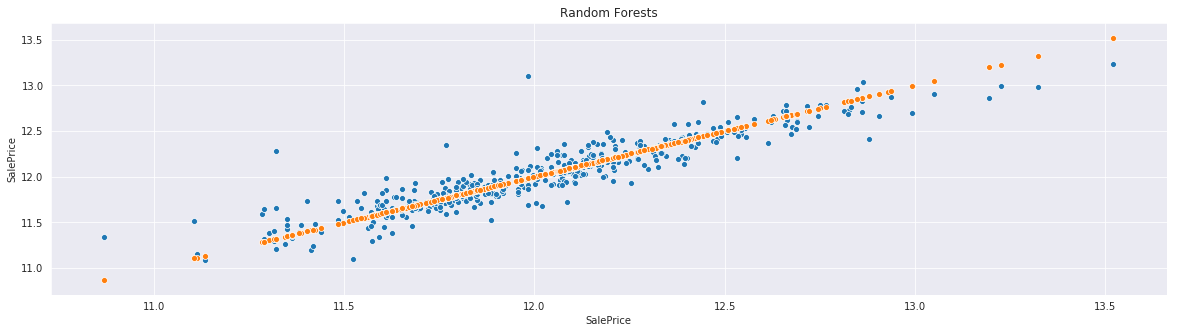

Erro Random Forests: 0.14966173655014542


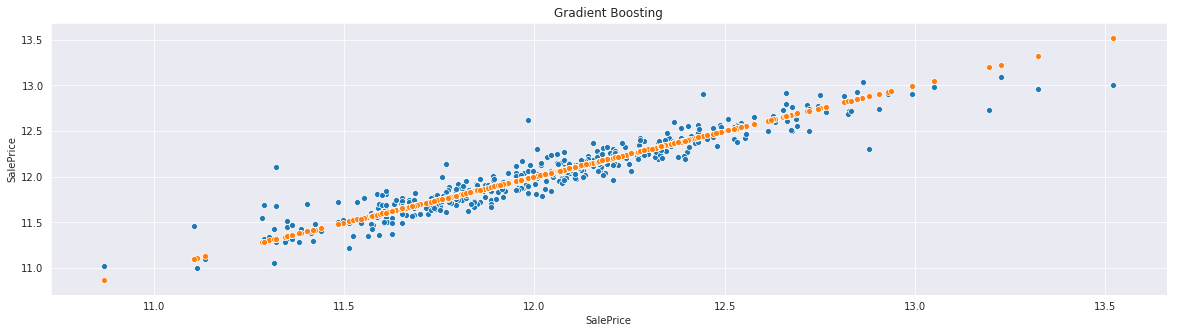

Erro Gradient Boosting: 0.12611549042018744


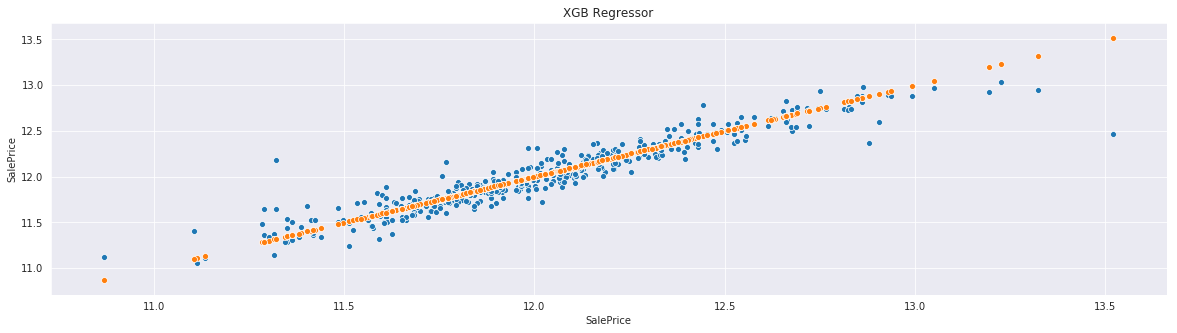

Erro XGB Regressor: 0.12676062118504144


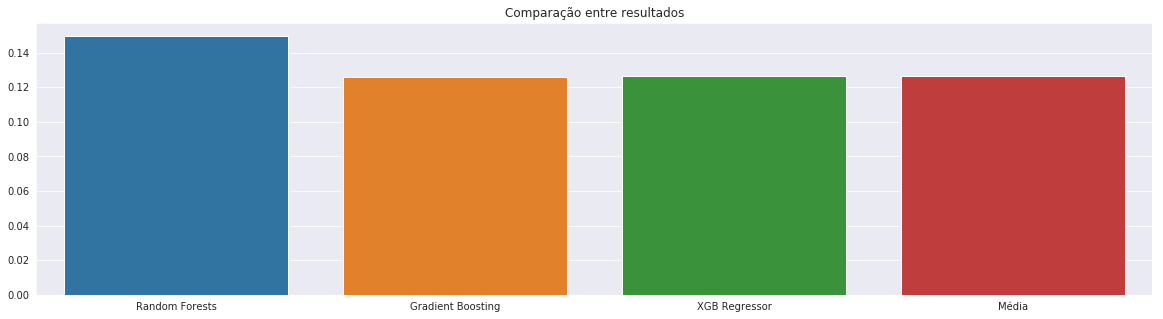

In [27]:
Train_Test_Model(X, Y)

# SELEÇÃO DE ATRIBUTOS

In [28]:
def Feature_Importances(X, Y):
    GBR = GradientBoostingRegressor()
    GBR.fit(X, Y)
    return pd.DataFrame(data = {"Importancia": 100*GBR.feature_importances_}, index = X.columns).sort_values(by = "Importancia", ascending = False)

In [29]:
FI = Feature_Importances(X, Y)
Sel = (FI["Importancia"] > 1)
FI[Sel]

,Importancia
OverallQual,46.200931
GrLivArea,16.962643
TotalBsmtSF,5.026983
GarageCars,4.671242
YearBuilt,3.568951
YearRemodAdd,2.811605
BsmtFinSF1,2.802635
GarageArea,1.800084
LotArea,1.541697
OverallCond,1.537752


In [30]:
X_N = X[(Feature_Importances(X, Y) > 1).index]
Y_N = Y

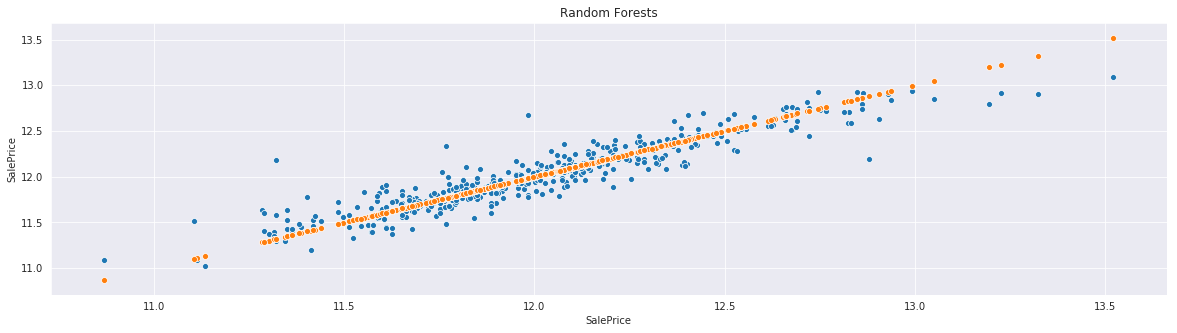

Erro Random Forests: 0.14271983788873335


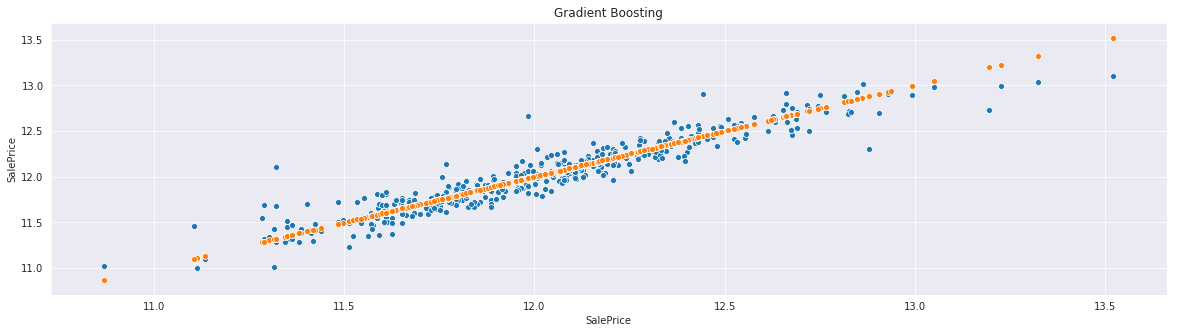

Erro Gradient Boosting: 0.12628218325355978


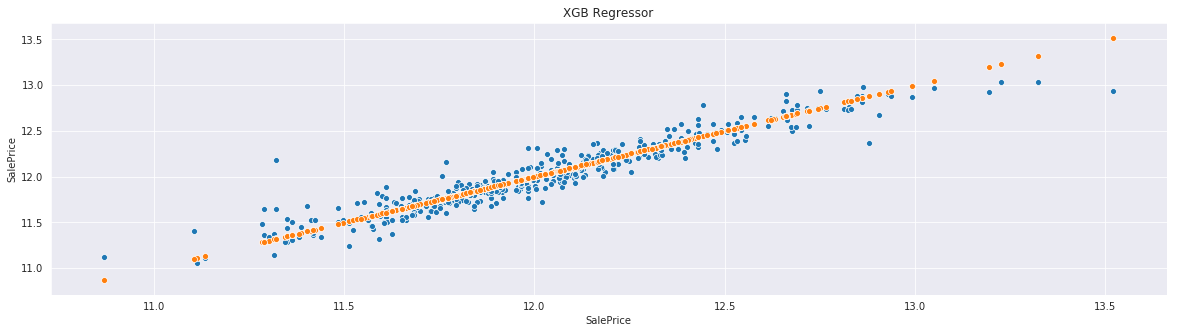

Erro XGB Regressor: 0.11939271031714437


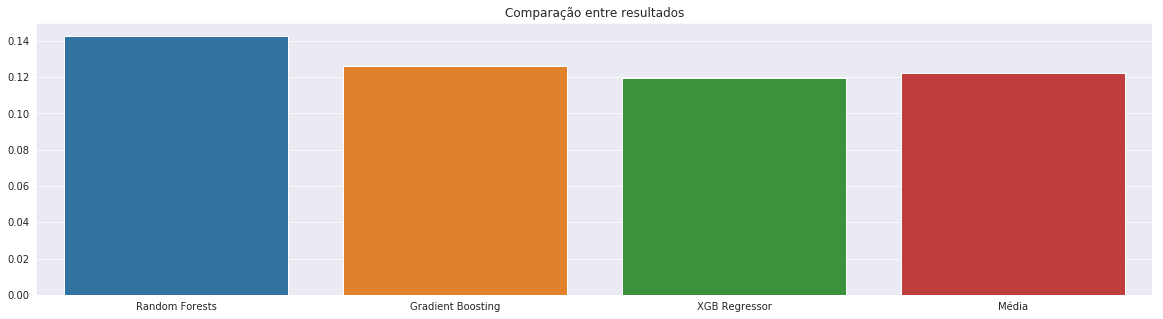

In [31]:
Train_Test_Model(X_N, Y_N)

# OTIMIZAÇÃO DO MODELO

In [32]:
def Optimize_XGB_Regressor(X, Y, Parameters):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
    XGB = XGBRegressor()
    Grid = GridSearchCV(XGB, Parameters, cv = 2)
    Grid.fit(X, Y)
    XGB = XGBRegressor(**Grid.best_params_)
    XGB.fit(x_train, y_train)
    return np.sqrt(mean_squared_error(y_test, XGB.predict(x_test)))

In [33]:
Parameter = {"n_estimators": [250, 300, 350], 
             "max_depth": [4, 5, 6], 
             "learning_rate": [0.05, 0.1, 0.125, 0.200], 
             "n_jobs": [6],
             "gamma": [0, 1, 2]}

In [34]:
Optimize_XGB_Regressor(X_N, Y_N, Parameter)

0.1148481245312114

# VERIFICAÇÃO DE OUTLIERS

In [35]:
def Verify_Outliers(Data):
    plt.figure(figsize = (20, 5))
    sns.boxplot(Data["SalePrice"])
    plt.title("Boxplot dos preços de venda")
    plt.show()

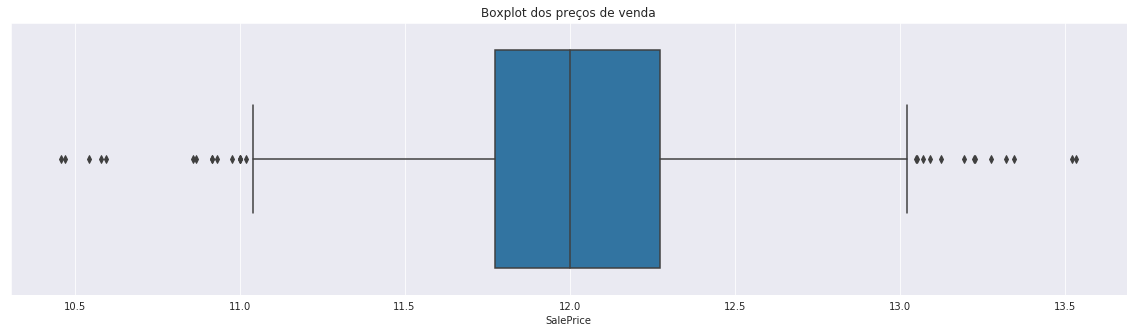

In [36]:
Verify_Outliers(Data_Dum)

In [37]:
def Remove_Ouliers(Data):
    Q1 = Data["SalePrice"].quantile(0.25)
    Q3 = Data["SalePrice"].quantile(0.75)
    IIQ = Q3 - Q1
    Lim_Inferior = Q1 - 1.5*IIQ
    Lim_Superior = Q3 + 1.5*IIQ
    Sel = (Data_Dum["SalePrice"] > Lim_Inferior) & (Data_Dum["SalePrice"] < Lim_Superior)
    Data_Dum_Correct = Data_Dum[Sel]
    return Data_Dum_Correct

In [38]:
Data_Dum_Correct = Remove_Ouliers(Data_Dum)

In [39]:
X = Data_Dum_Correct.drop(columns = ["Id", "SalePrice"])
Y = Data_Dum_Correct["SalePrice"]

In [40]:
Data_Dum.shape

(1460, 306)

In [41]:
Data_Dum_Correct.shape

(1432, 306)

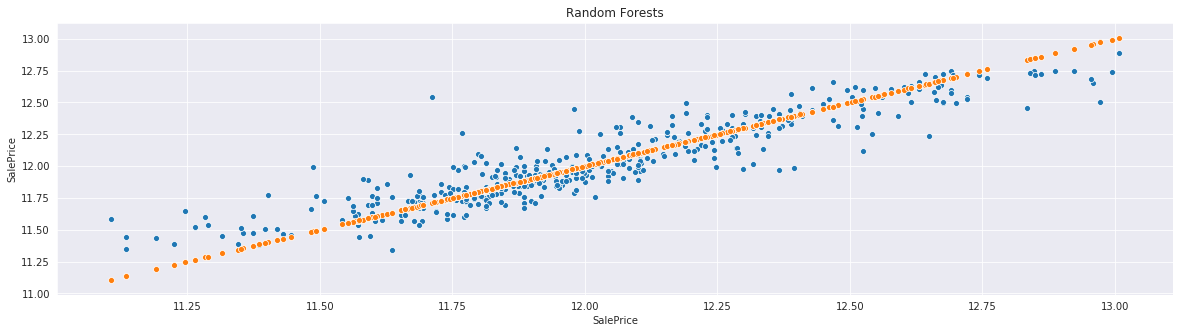

Erro Random Forests: 0.1443639365022407


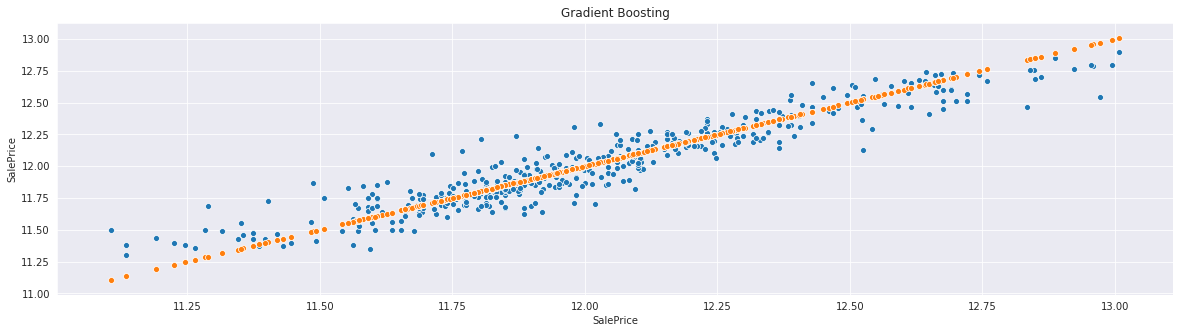

Erro Gradient Boosting: 0.1211082201859953


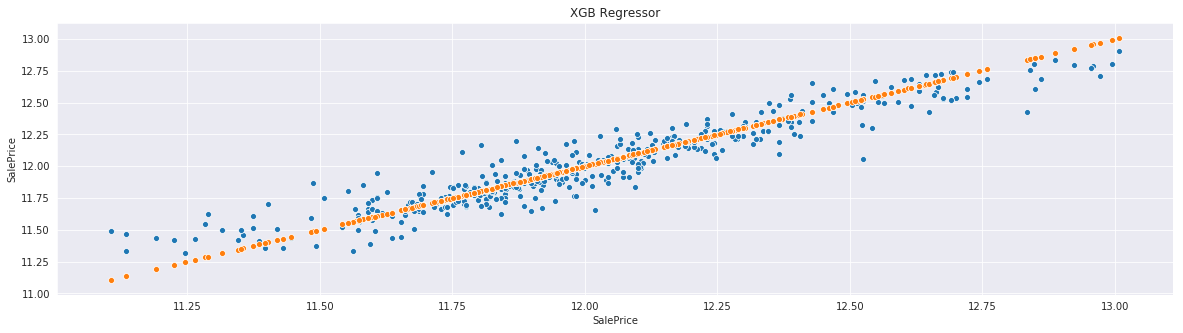

Erro XGB Regressor: 0.11825611120560128


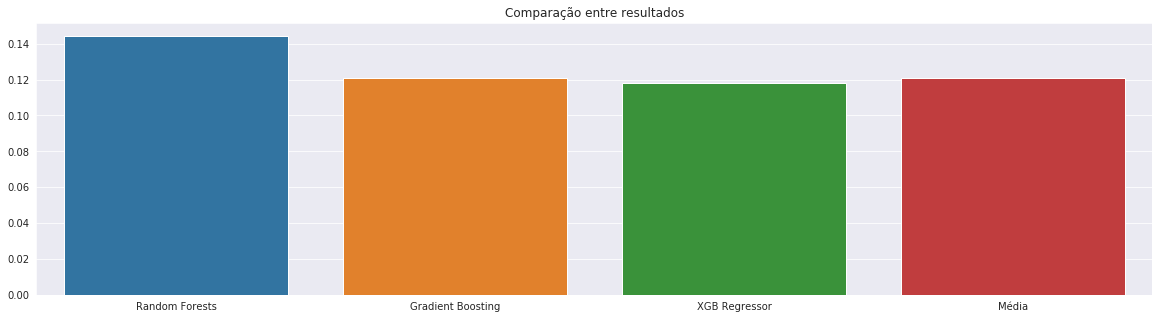

In [42]:
Train_Test_Model(X, Y)

# SELEÇÃO DE ATRIBUTOS

In [43]:
FI = Feature_Importances(X, Y)
Sel = (FI["Importancia"] > 1)
FI[Sel]

,Importancia
OverallQual,45.872098
GrLivArea,16.668996
TotalBsmtSF,5.301702
GarageCars,4.037465
BsmtFinSF1,3.420636
YearBuilt,3.219785
YearRemodAdd,2.940086
ExterQual_TA,2.801419
LotArea,1.851484
OverallCond,1.408198


In [44]:
X_N = X[(Feature_Importances(X, Y) > 1).index]
Y_N = Y

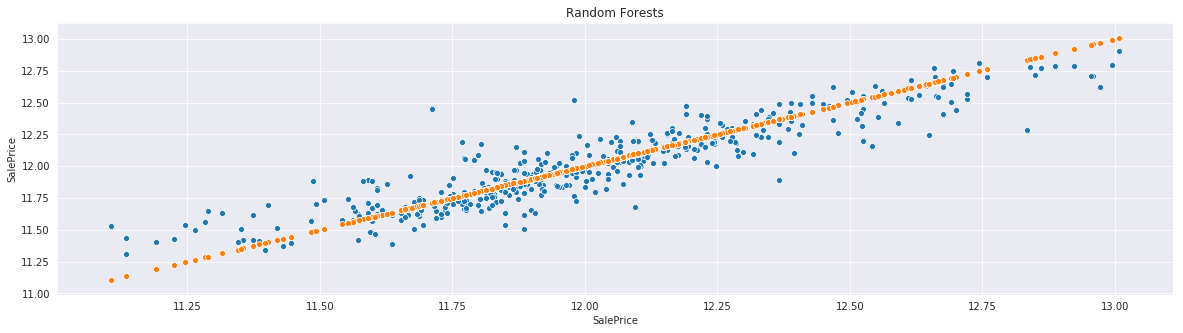

Erro Random Forests: 0.1435272353820732


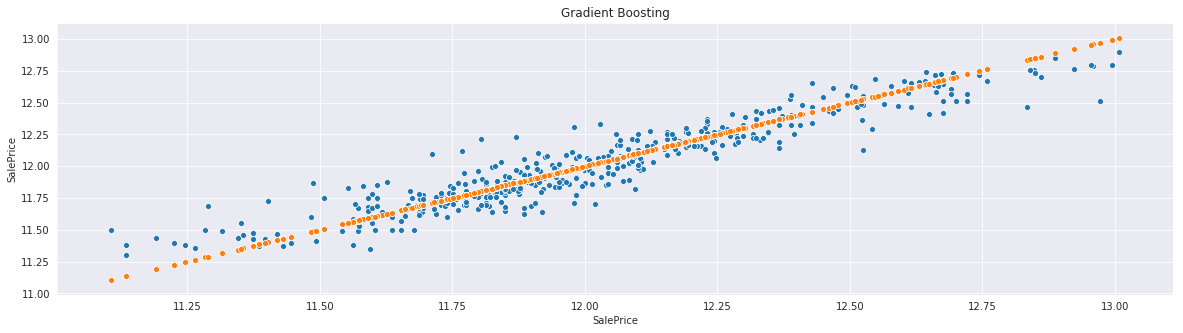

Erro Gradient Boosting: 0.12123479639560578


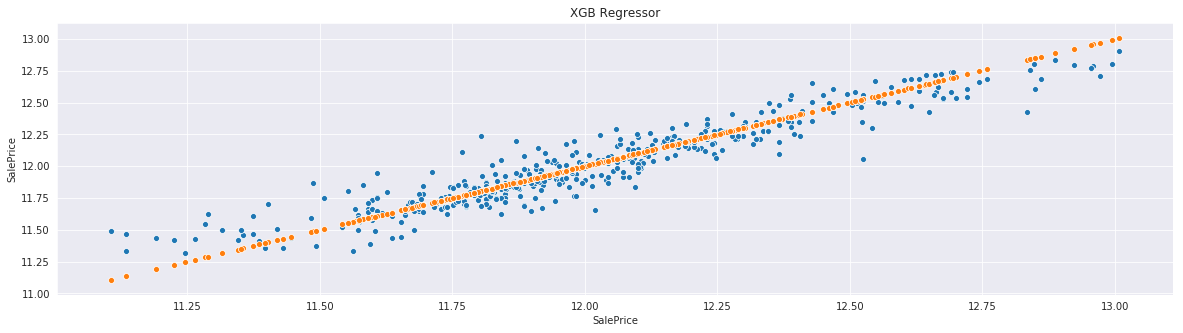

Erro XGB Regressor: 0.11857870814191497


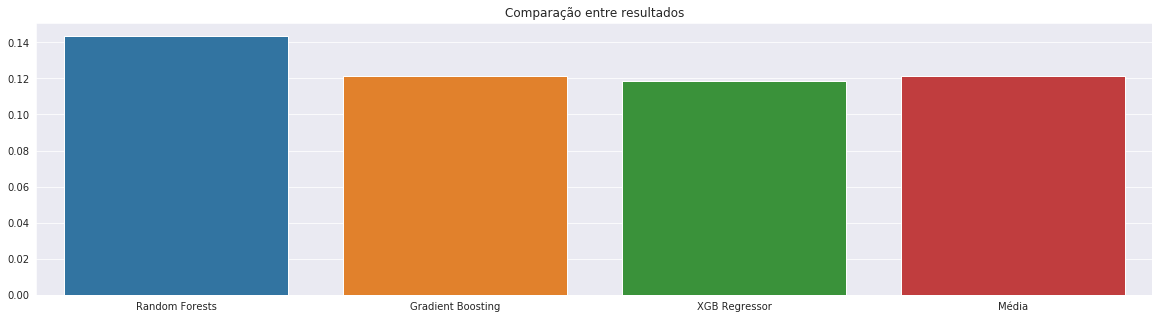

In [45]:
Train_Test_Model(X_N, Y_N)

# OTIMIZAÇÃO DO MODELO

In [46]:
Optimize_XGB_Regressor(X_N, Y_N, Parameter)

0.11070448164310834